## 0. Imports, Paths and Helper Functions

### 0.1 Imports

In [1]:
import json
import psycopg2
import itertools

import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt



from IPython.core.display  import HTML
from IPython.display       import Image
from tabulate              import tabulate

from scipy                 import stats           as ss

### 0.2 Paths

In [2]:
data = '../data/'
raw  = 'raw/'
interim = 'interim/'

images_path = '../reports/figures/'

### 0.3 Helper Functions

In [3]:
def cramer_v(x,y):
    cm = pd.crosstab(x,y).values
    n = cm.sum()
    r,k = cm.shape
    
    chi2 = ss.chi2_contingency(cm)[0]
    chi2corr = max(0,chi2 - (k-1)*(r-1)/(n-1))
    
    kcorr=k - (k-1)**2/(n-1) 
    rcorr=r - (r-1)**2/(n-1) 
    
    v = np.sqrt( (chi2corr/n) / (min (kcorr-1,rcorr-1)))
    return v


def categorical_feature_correlation(df_cat):
    cat_list = df_cat.columns.to_list()
    dic_corr = {cat : [] for cat in cat_list}
    
    for a,b in itertools.product(cat_list,repeat=2):
        dic_corr[a].append(cramer_v(df_cat[a],df_cat[b]))

    return pd.DataFrame(dic_corr,index=cat_list)


def cat_info(ax,total,size = 25,file=False):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(height/total*100),
                ha="center",size=size) 
    plt.show()
    
    
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [4]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 4 - Exploratory Data Analysis

In [5]:
df4 = pd.read_csv(data+interim+'fe-filtering.csv')

In [6]:
df4.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,male,23,11.0,152.0,1,below_year,1,0,23367.0,249,0
1,13,female,41,15.0,14.0,1,between_12years,0,1,31409.0,221,0
2,18,female,25,35.0,152.0,1,below_year,0,1,46622.0,299,0
3,31,female,26,8.0,160.0,1,below_year,0,0,2630.0,136,0
4,39,male,45,8.0,124.0,1,between_12years,1,0,42297.0,264,0


### 4.1 - Univariate Analysis

#### 4.1.1 Response Variable

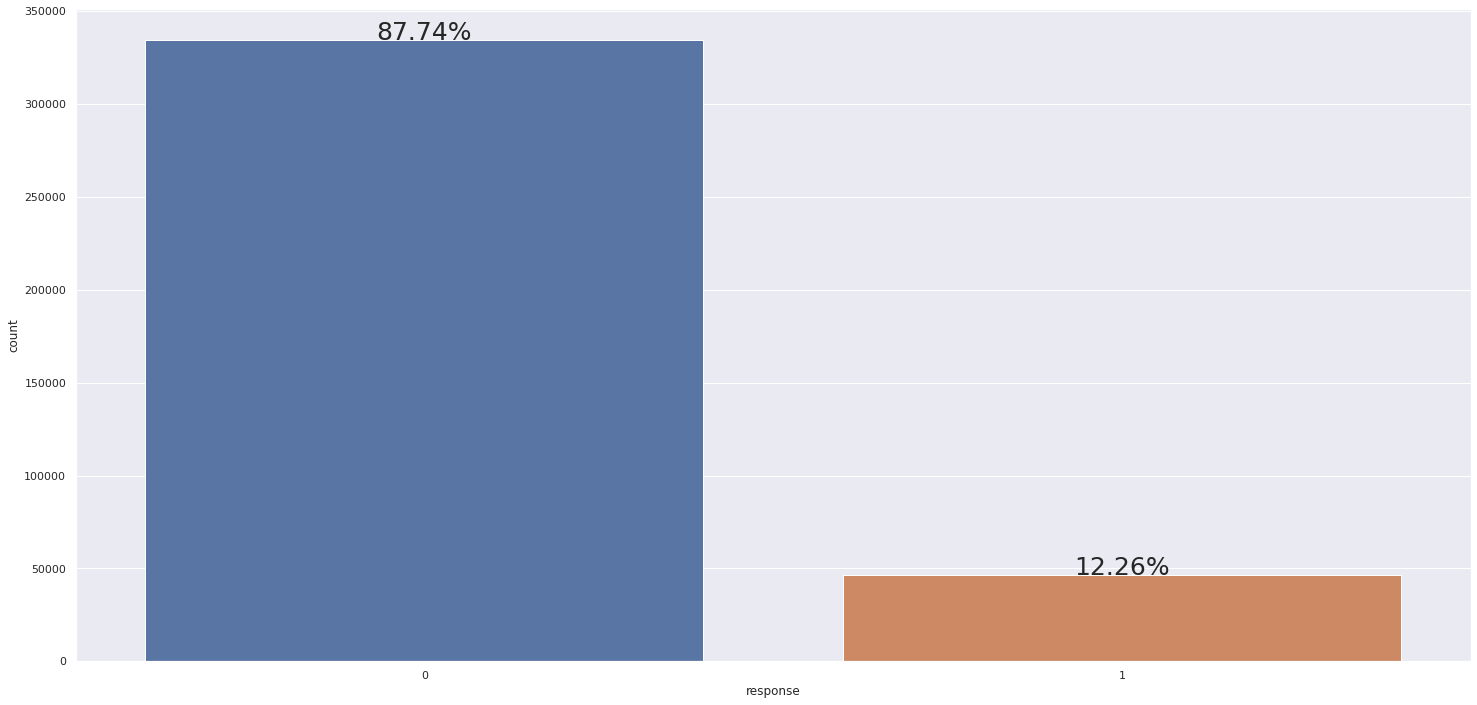

In [7]:
ax=sns.countplot(x=df4['response'])
cat_info(ax,len(df4['response']))


#### 4.1.2  Gender

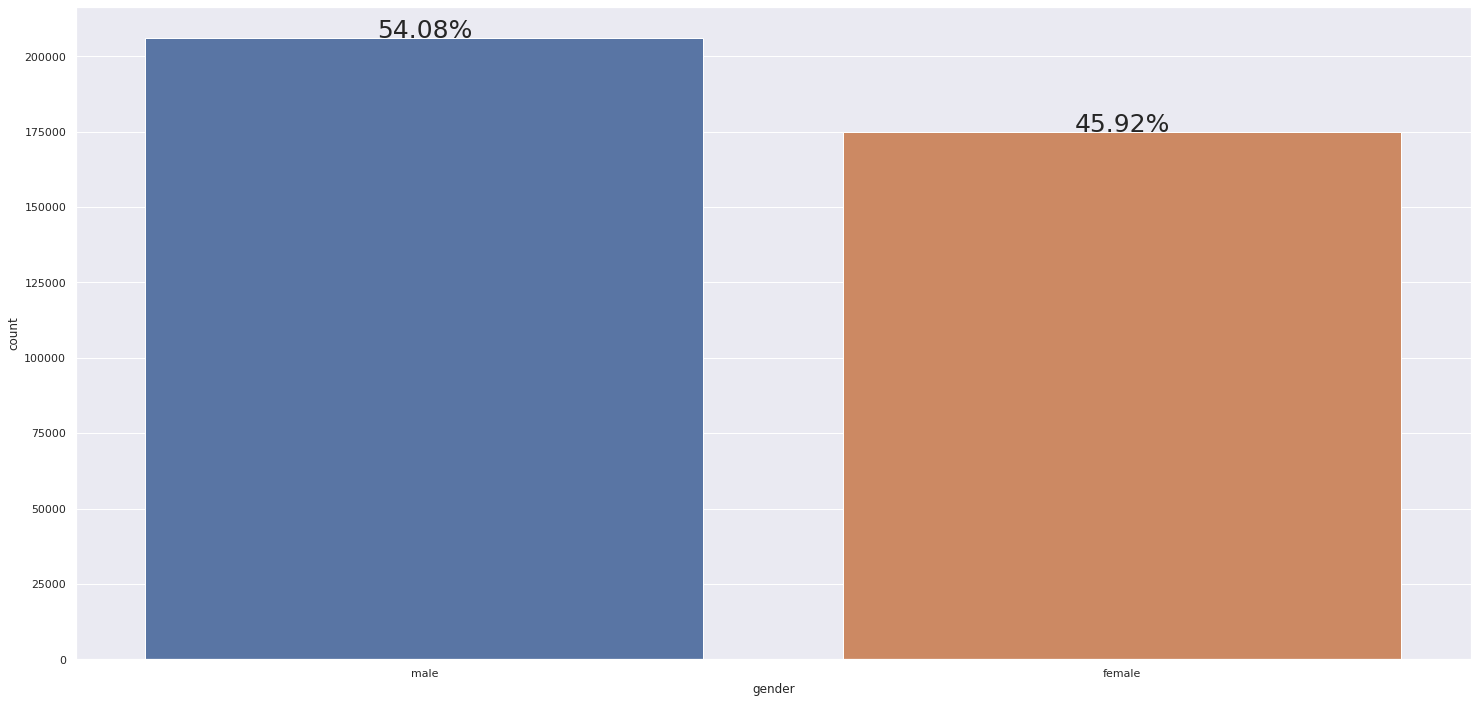

In [8]:
cat_info(sns.countplot(x=df4['gender']),len(df4['gender']))

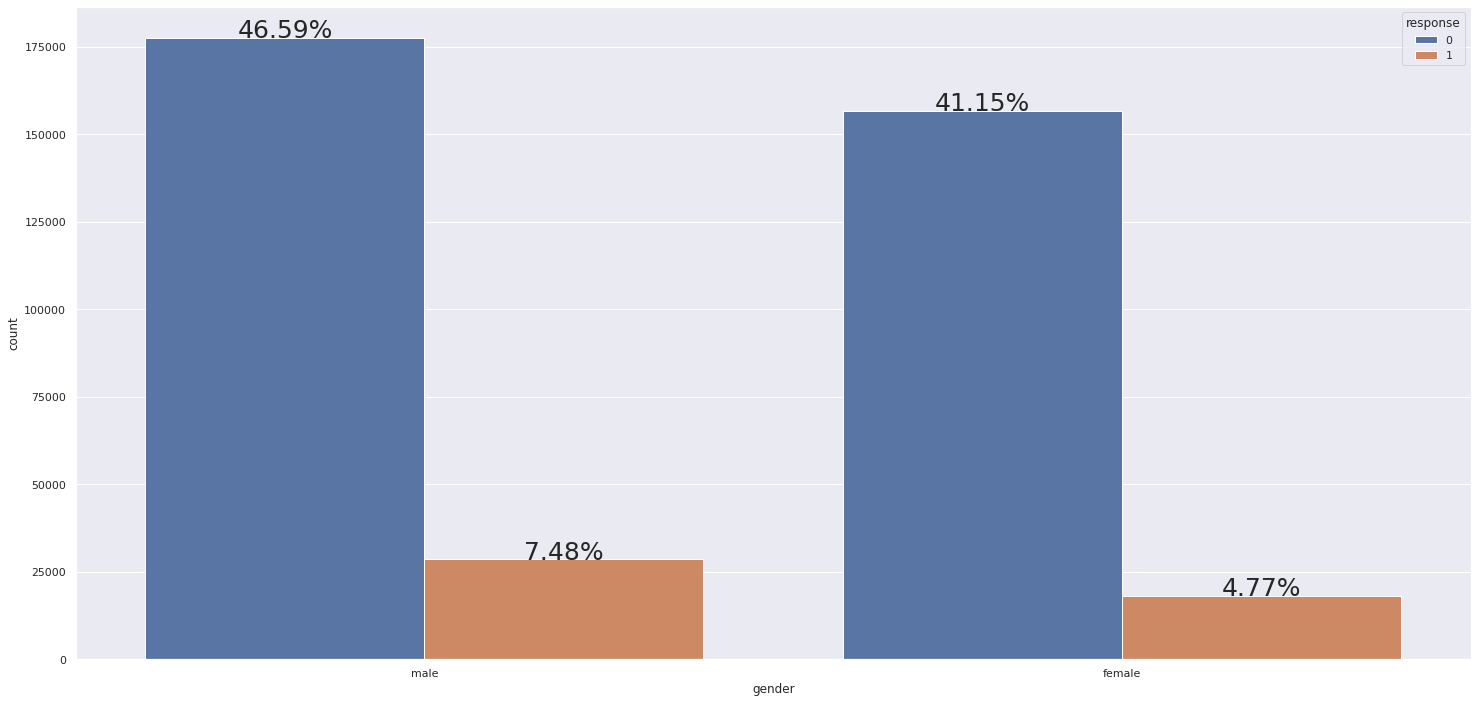

In [9]:
ax = sns.countplot(x='gender',hue='response',data=df4)
total = len(df4['gender'])
cat_info(ax,total)

#### 4.1.3 Age

<AxesSubplot:xlabel='age', ylabel='Count'>

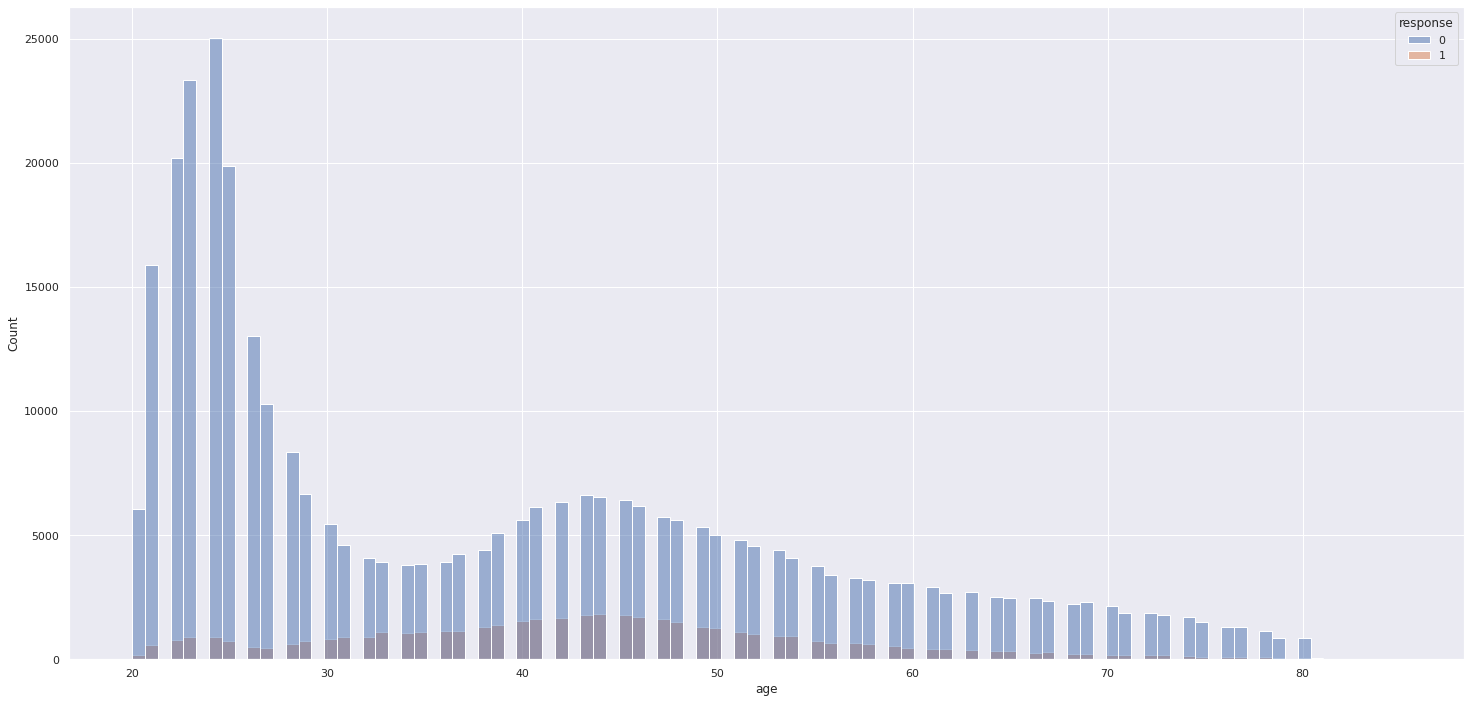

In [10]:
sns.histplot(x='age',hue='response',data=df4)

#### 4.1.4 Region Code

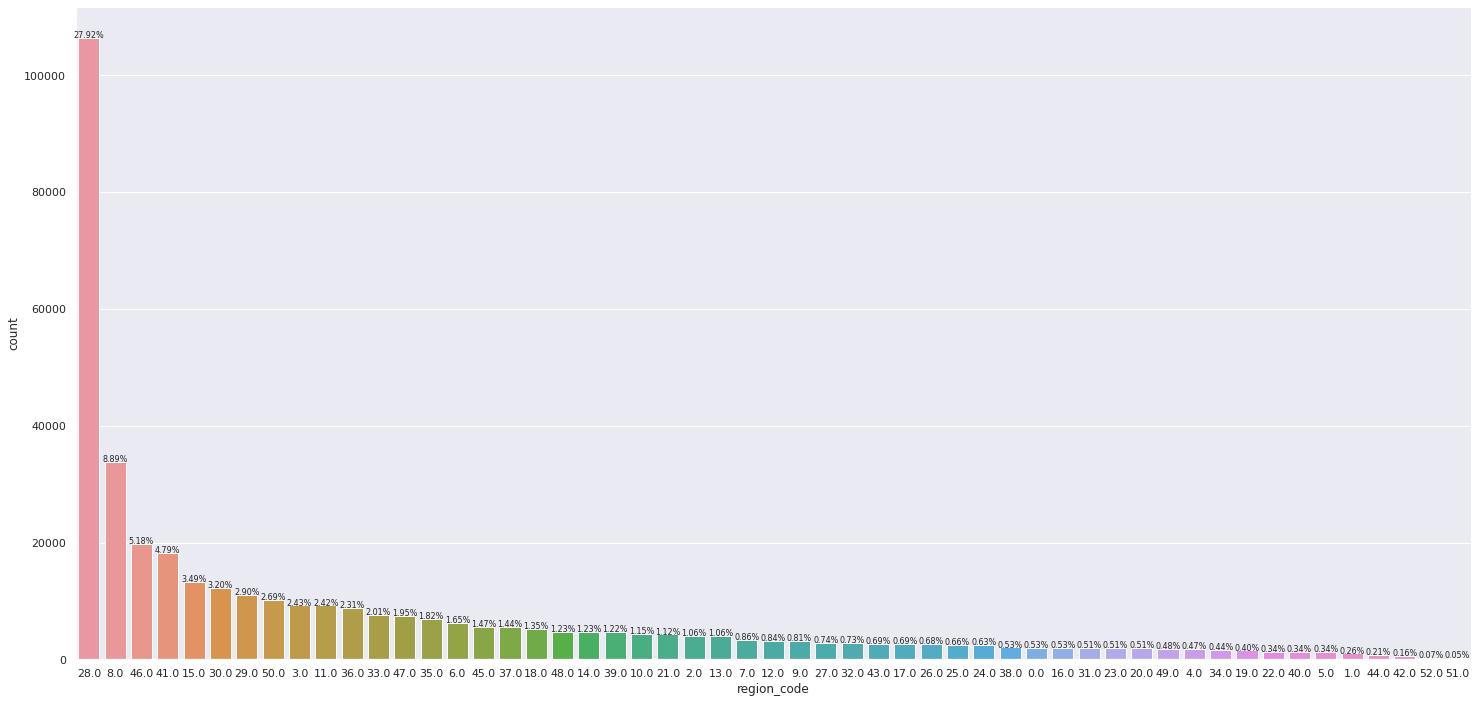

In [11]:
ax = sns.countplot(x='region_code',data=df4,order=df4['region_code'].value_counts().index)
cat_info(ax,total,size=8)

<AxesSubplot:xlabel='region_code', ylabel='vintage'>

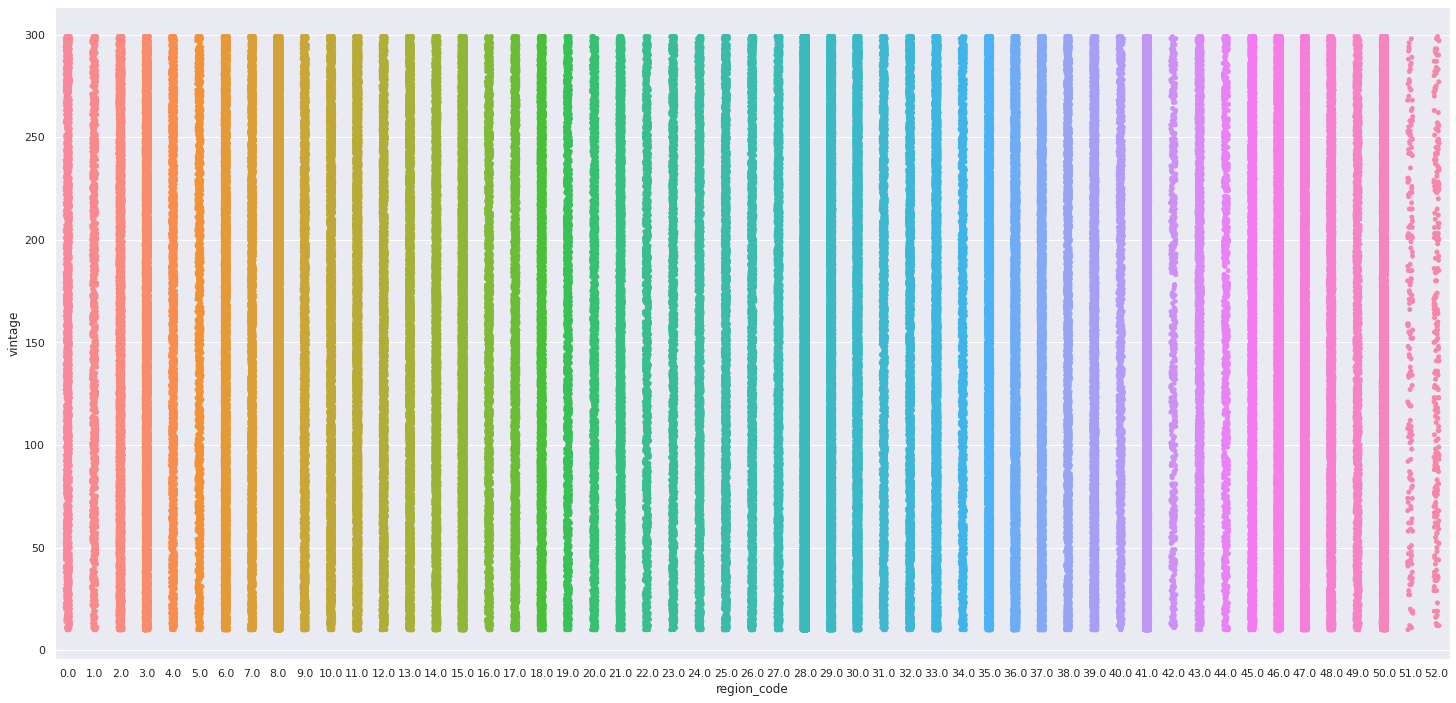

In [12]:
sns.stripplot(x='region_code',y='vintage', data=df4)

#### 4.1.5 Sales Channel

<AxesSubplot:xlabel='policy_sales_channel', ylabel='%r1'>

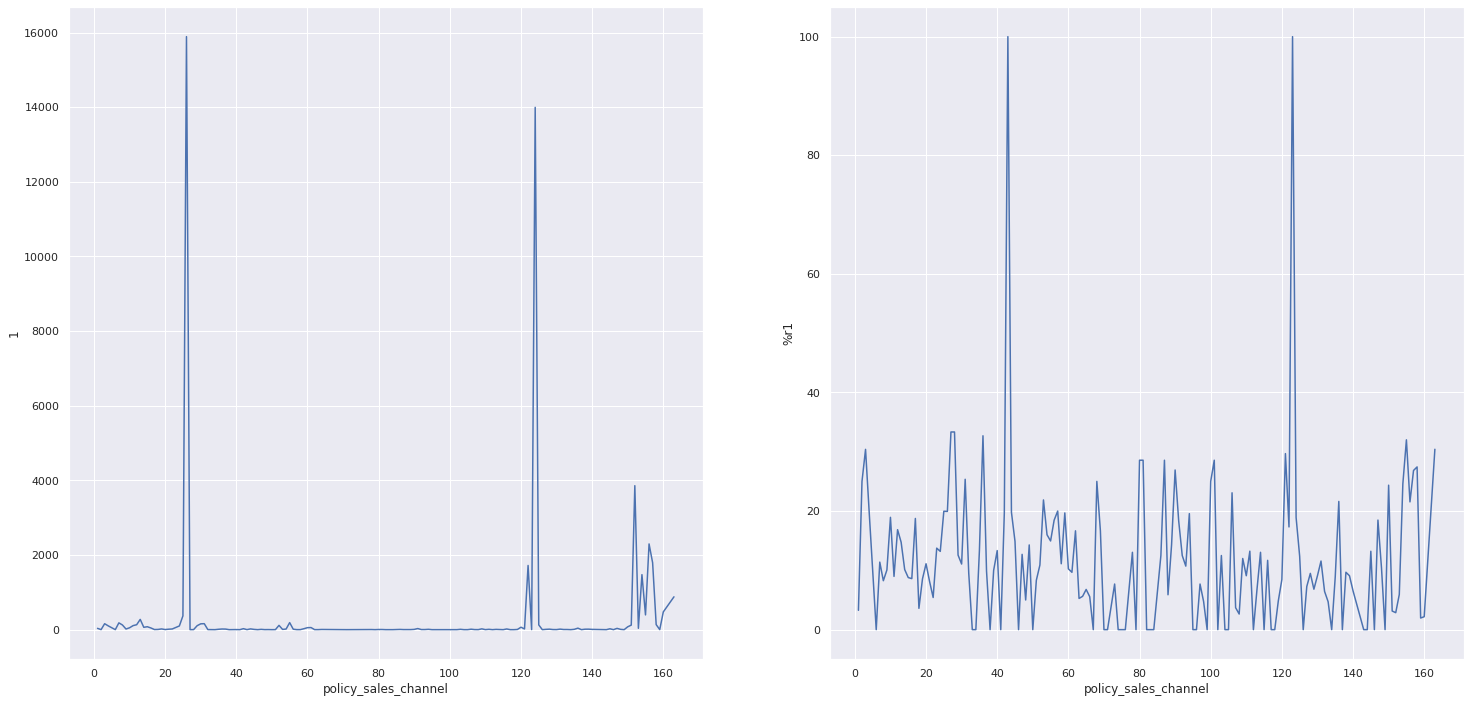

In [13]:
aux = pd.crosstab(df4['policy_sales_channel'],df4['response'])
aux['%r1'] = 100*aux[1]/(aux[1]+aux[0])

plt.subplot(1,2,1)
sns.lineplot(x=aux.index,y=aux[1])
plt.subplot(1,2,2)
sns.lineplot(x=aux.index,y=aux['%r1'])

In [14]:
aux

response,0,1,%r1
policy_sales_channel,,,
1.0,1039,35,3.258845
2.0,3,1,25.000000
3.0,364,159,30.401530
4.0,407,102,20.039293
6.0,3,0,0.000000
7.0,1416,182,11.389237
8.0,1390,125,8.250825
9.0,152,17,10.059172
10.0,214,50,18.939394


#### 4.1.6 Driving License

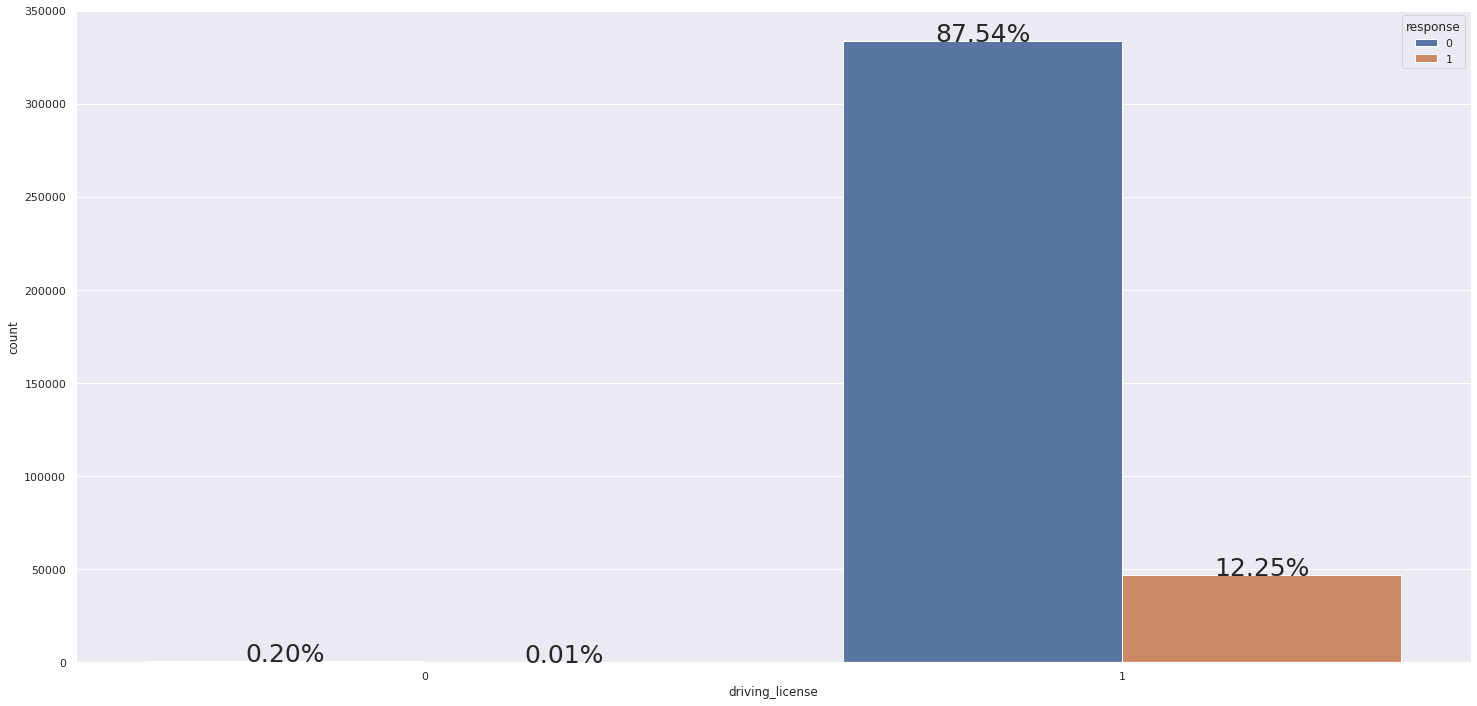

In [15]:
ax = sns.countplot(x='driving_license',hue='response',data=df4)
cat_info(ax,total)

<AxesSubplot:xlabel='driving_license', ylabel='annual_premium'>

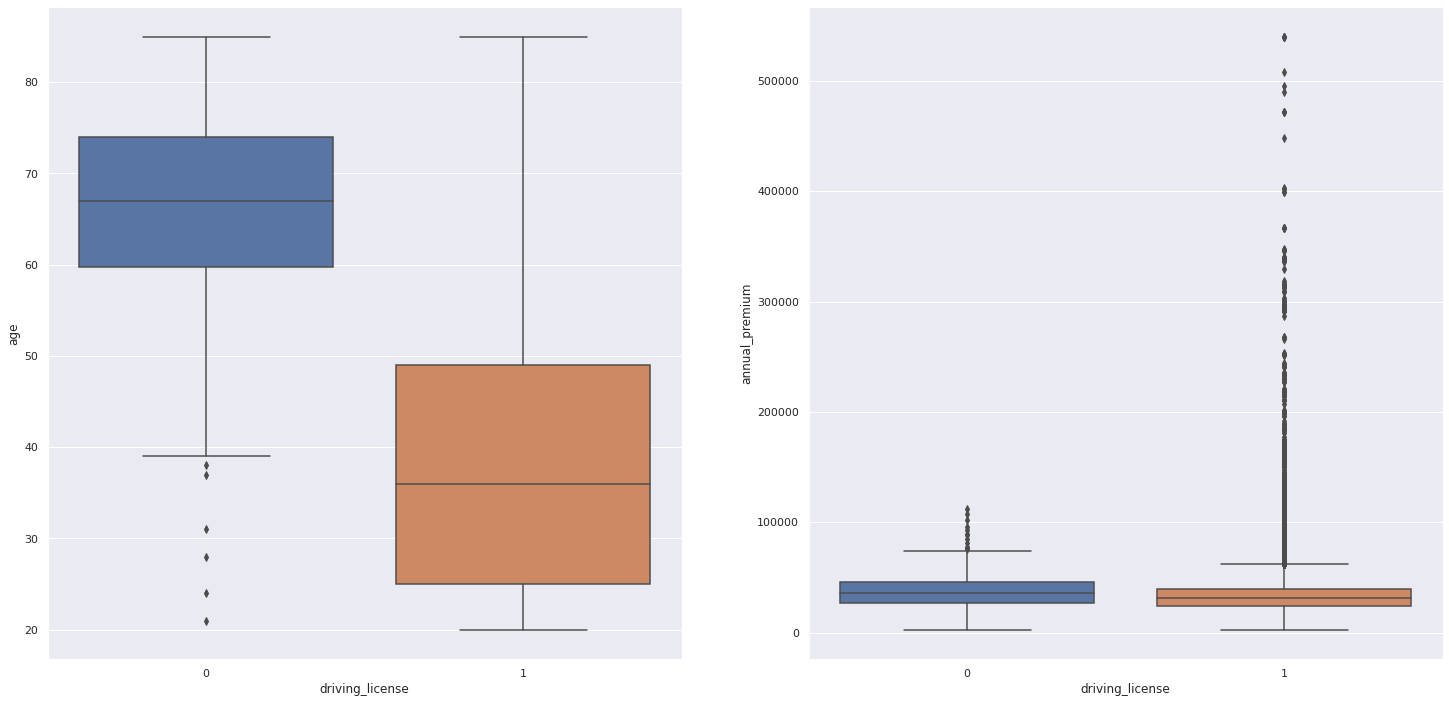

In [16]:
plt.subplot(1,2,1)
sns.boxplot(x='driving_license',y='age',data=df4)

plt.subplot(1,2,2)
sns.boxplot(x='driving_license',y='annual_premium',data=df4)

#### 4.1.7 Vehicle Age

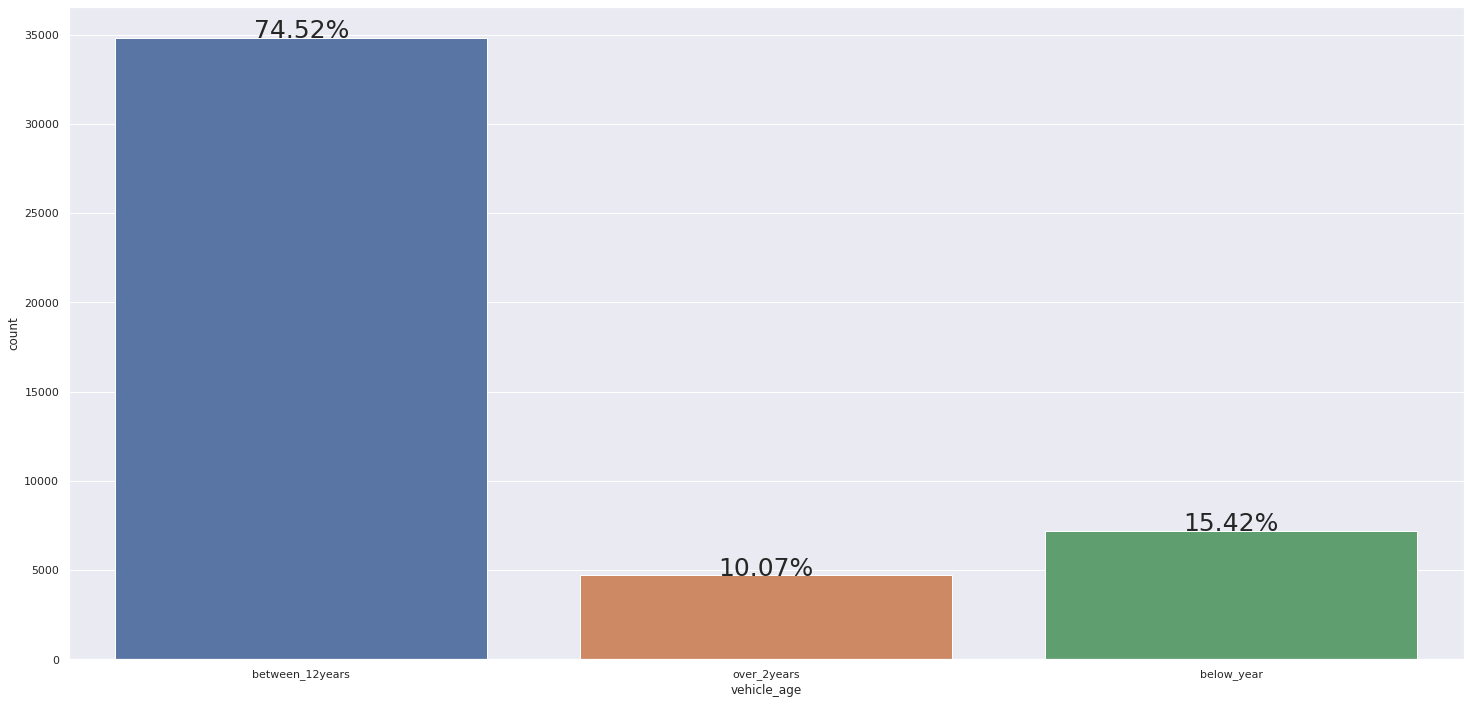

In [17]:
ax = sns.countplot(x = 'vehicle_age',data=df4[df4['response']==1])
cat_info(ax,df4[df4['response']==1].shape[0])

<AxesSubplot:xlabel='vehicle_age', ylabel='annual_premium'>

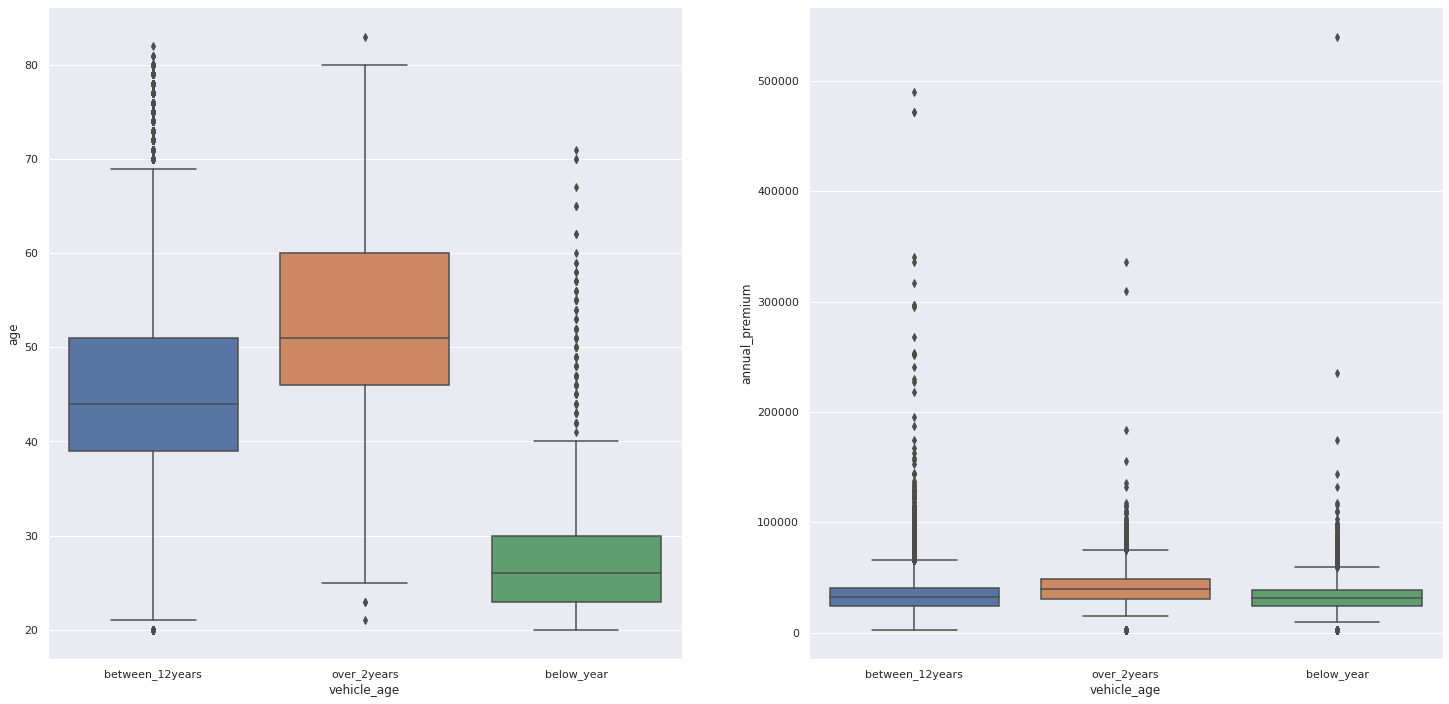

In [18]:
plt.subplot(1,2,1)
sns.boxplot(x='vehicle_age',y='age',data=df4[df4['response']==1])

plt.subplot(1,2,2)
sns.boxplot(x='vehicle_age',y='annual_premium',data=df4[df4['response']==1])


#### 4.1.8 Vehicle Damage

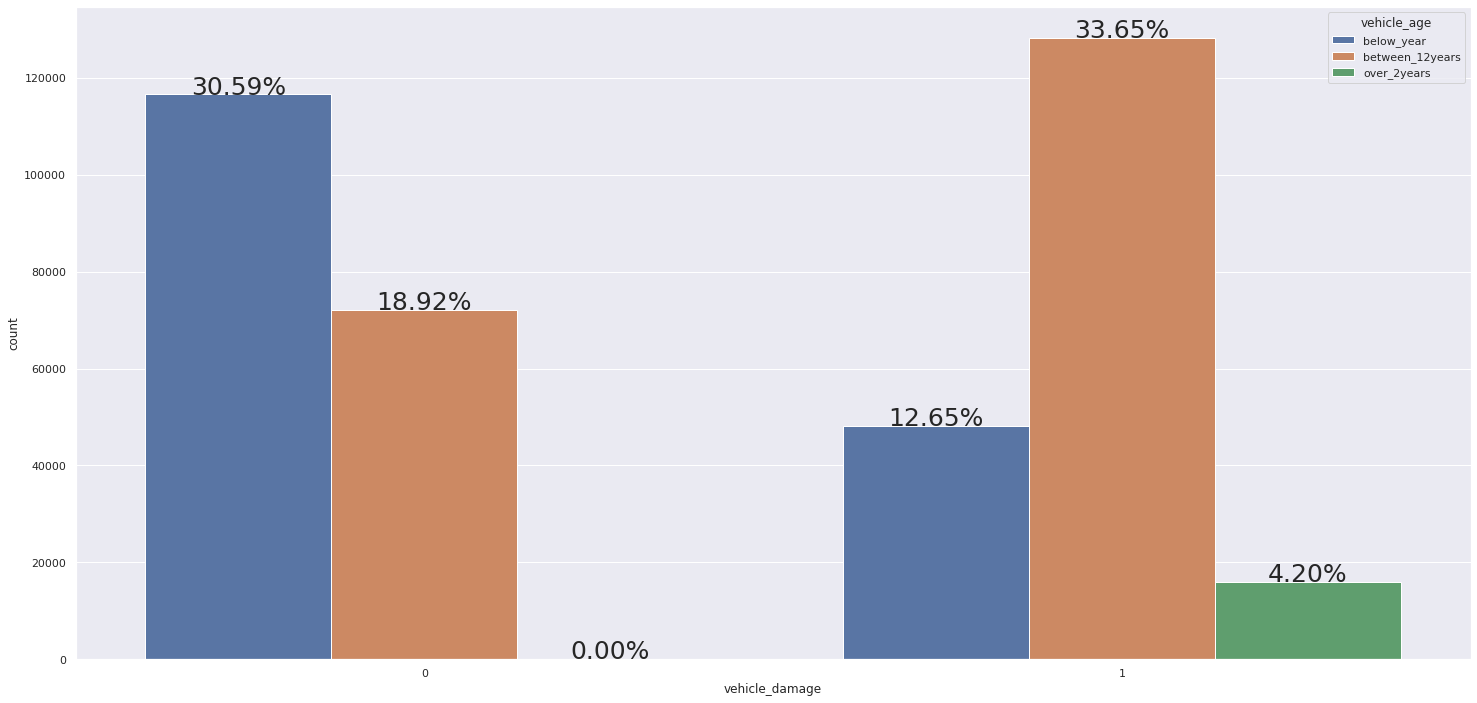

In [19]:
ax = sns.countplot(x='vehicle_damage',hue='vehicle_age',data=df4)
t = cat_info(ax,total)

<AxesSubplot:xlabel='vehicle_damage', ylabel='annual_premium'>

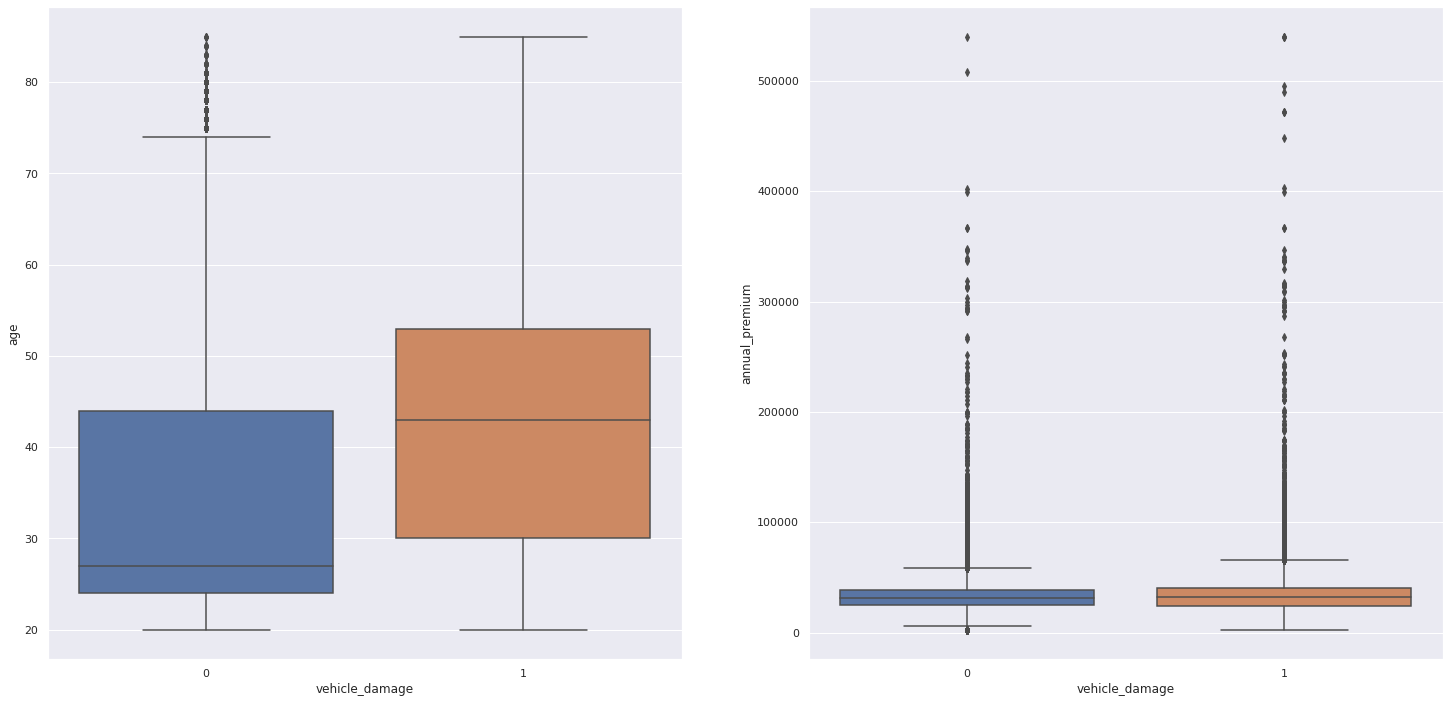

In [20]:
plt.subplot(1,2,1)
sns.boxplot(x='vehicle_damage',y='age',data=df4)

plt.subplot(1,2,2)
sns.boxplot(x='vehicle_damage',y='annual_premium',data=df4)

In [21]:
vd0 = df4[df4['vehicle_damage']==0]['age'].mean()
vd1 = df4[df4['vehicle_damage']==1]['age'].mean()

print(f'vd0:{vd0} // vd1:{vd1}')

vd0:34.63202717598677 // vd1:42.932187534106326


#### 4.1.9 Previously insured

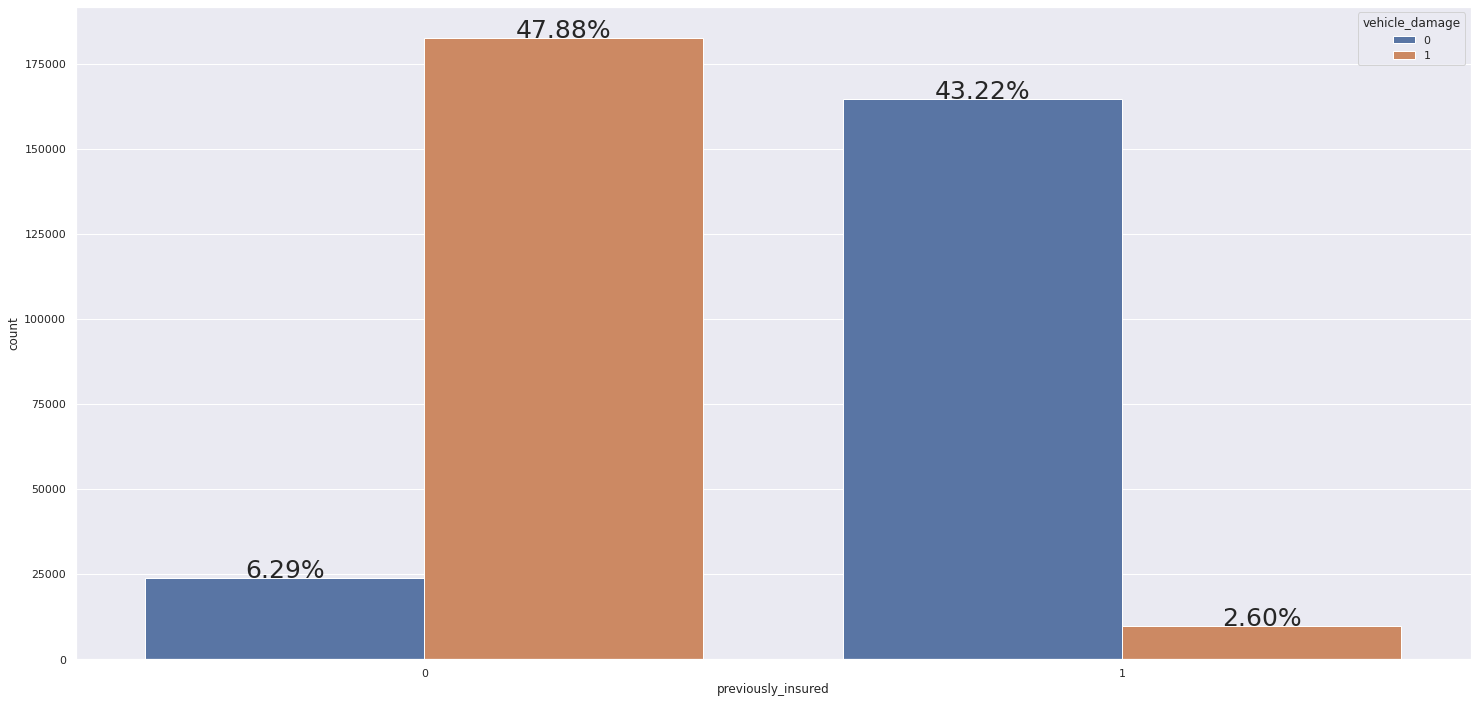

In [22]:
ax=sns.countplot(x='previously_insured',hue='vehicle_damage',data=df4)
cat_info(ax,total)

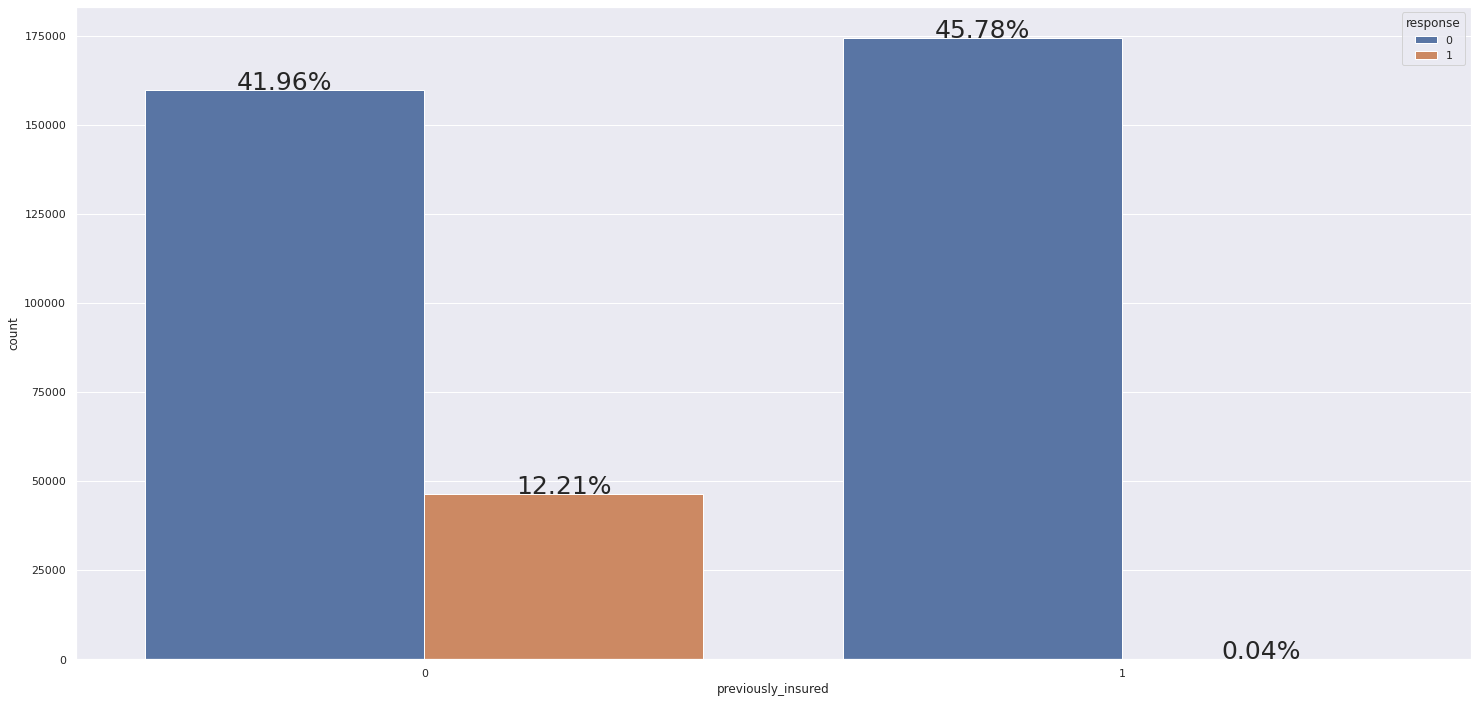

In [23]:
ax=sns.countplot(x='previously_insured',hue='response',data=df4)
cat_info(ax,total)

<AxesSubplot:xlabel='previously_insured', ylabel='annual_premium'>

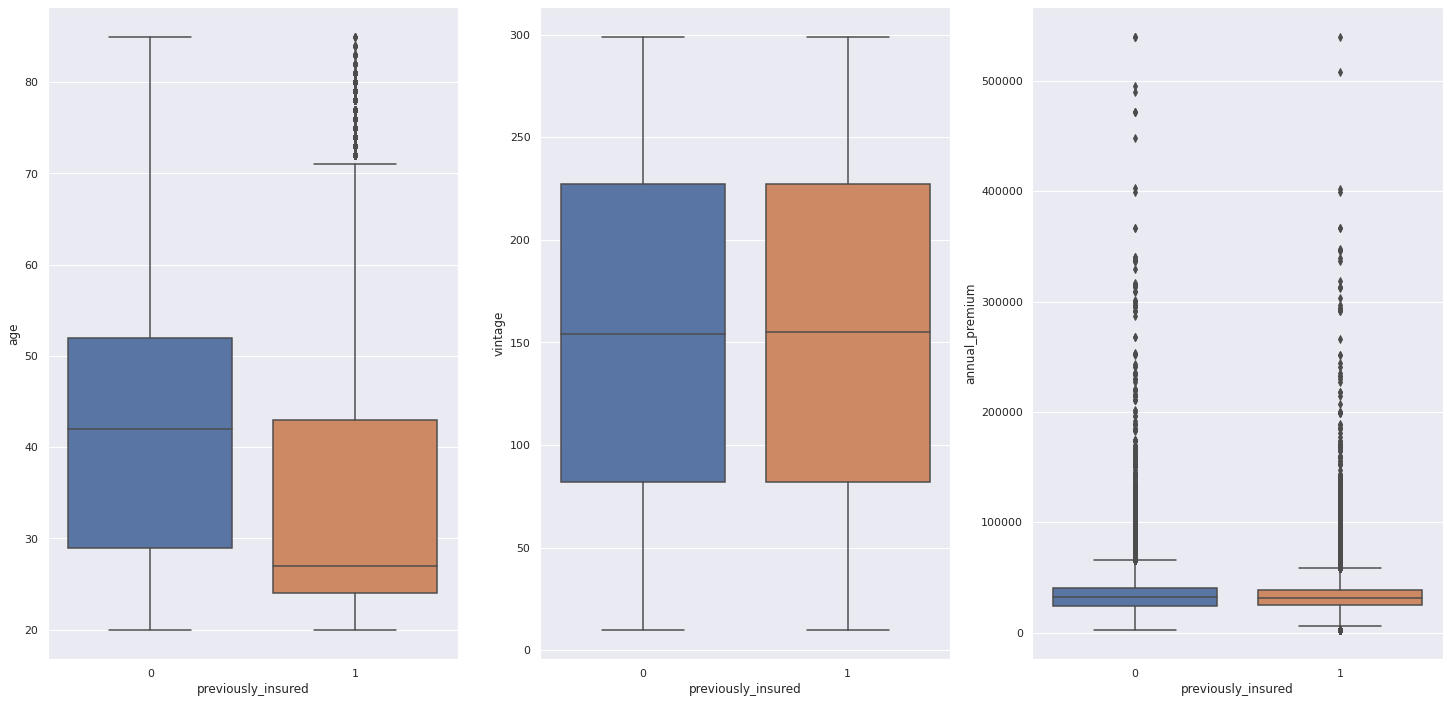

In [24]:
plt.subplot(131)
sns.boxplot(x='previously_insured',y='age',data=df4)

plt.subplot(132)
sns.boxplot(x='previously_insured',y='vintage',data=df4)

plt.subplot(133)
sns.boxplot(x='previously_insured',y='annual_premium',data=df4)

#### 4.1.10 Annual Premium

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

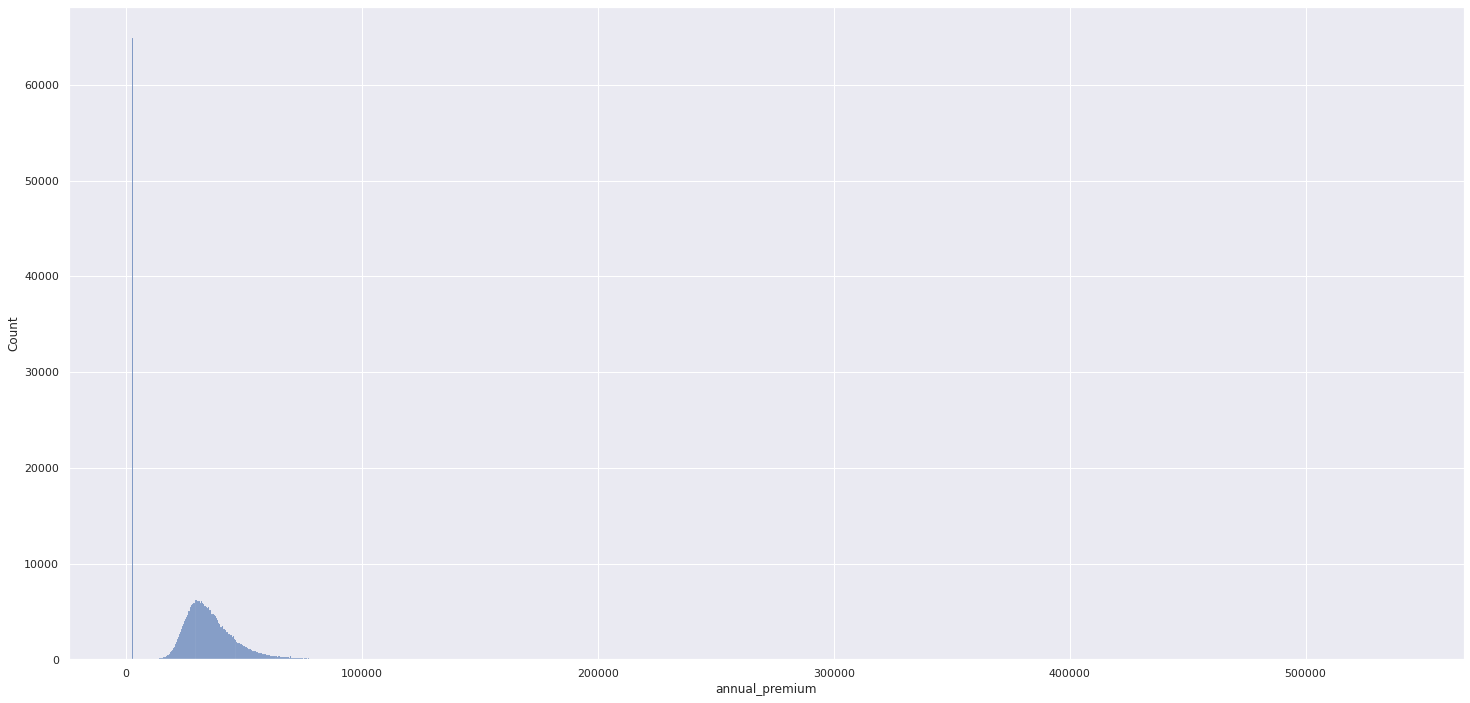

In [25]:

sns.histplot(x='annual_premium',data=df4)

<AxesSubplot:ylabel='annual_premium'>

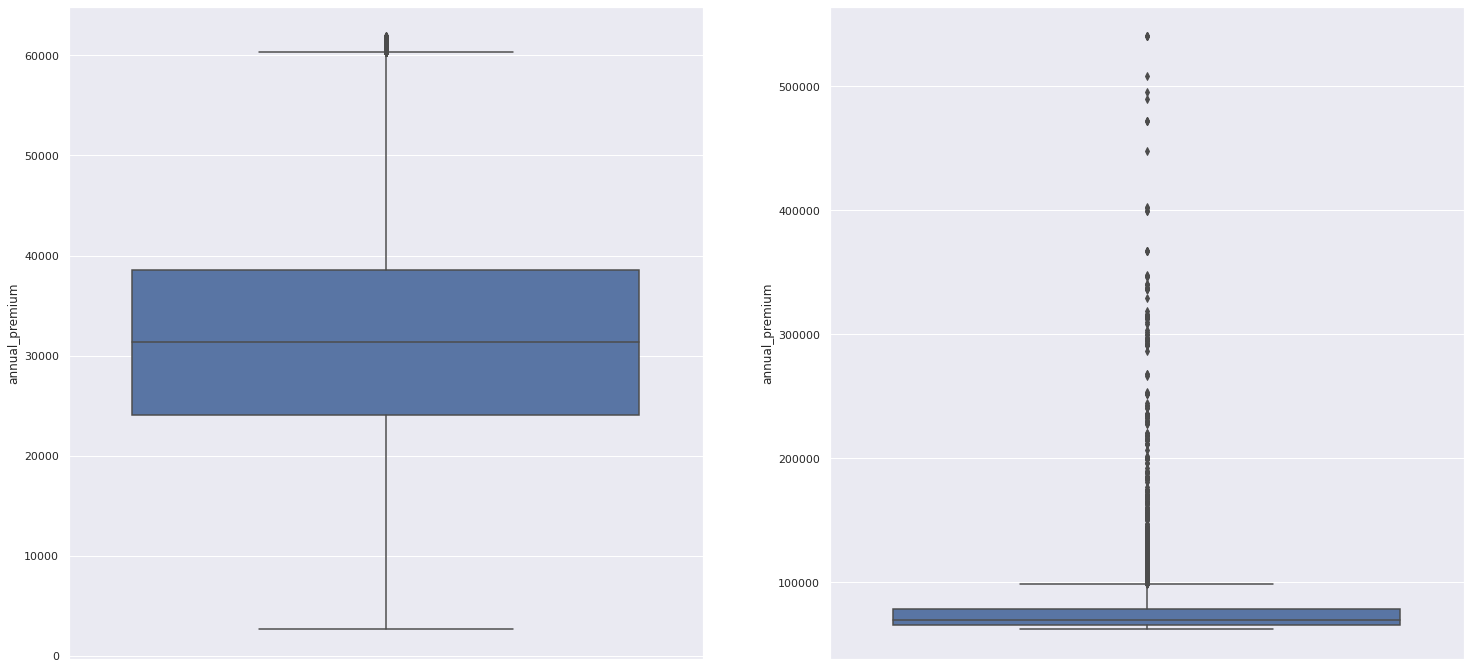

In [26]:
q1,q3 = np.quantile(df4['annual_premium'],q=[0.25,0.75])
iqr = q3-q1
plt.subplot(121)
sns.boxplot(y='annual_premium',data=df4[df4['annual_premium'] < (1.5*iqr + q3)] )

plt.subplot(122)
sns.boxplot(y='annual_premium',data=df4[df4['annual_premium'] > (1.5*iqr + q3)] )


<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

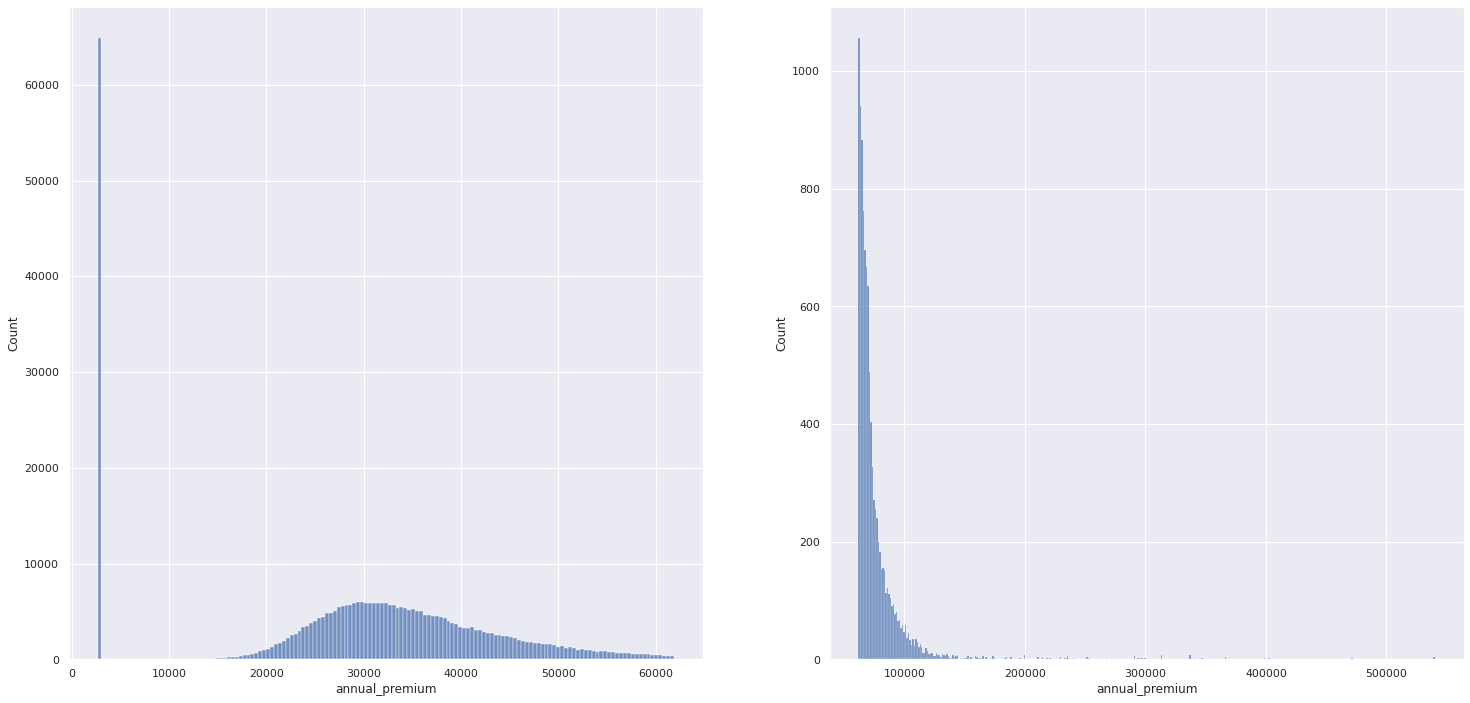

In [27]:
plt.subplot(121)
sns.histplot(x='annual_premium',data=df4[df4['annual_premium'] < (1.5*iqr + q3)] )

plt.subplot(122)
sns.histplot(x='annual_premium',data=df4[df4['annual_premium'] > (1.5*iqr + q3)] )

<AxesSubplot:>

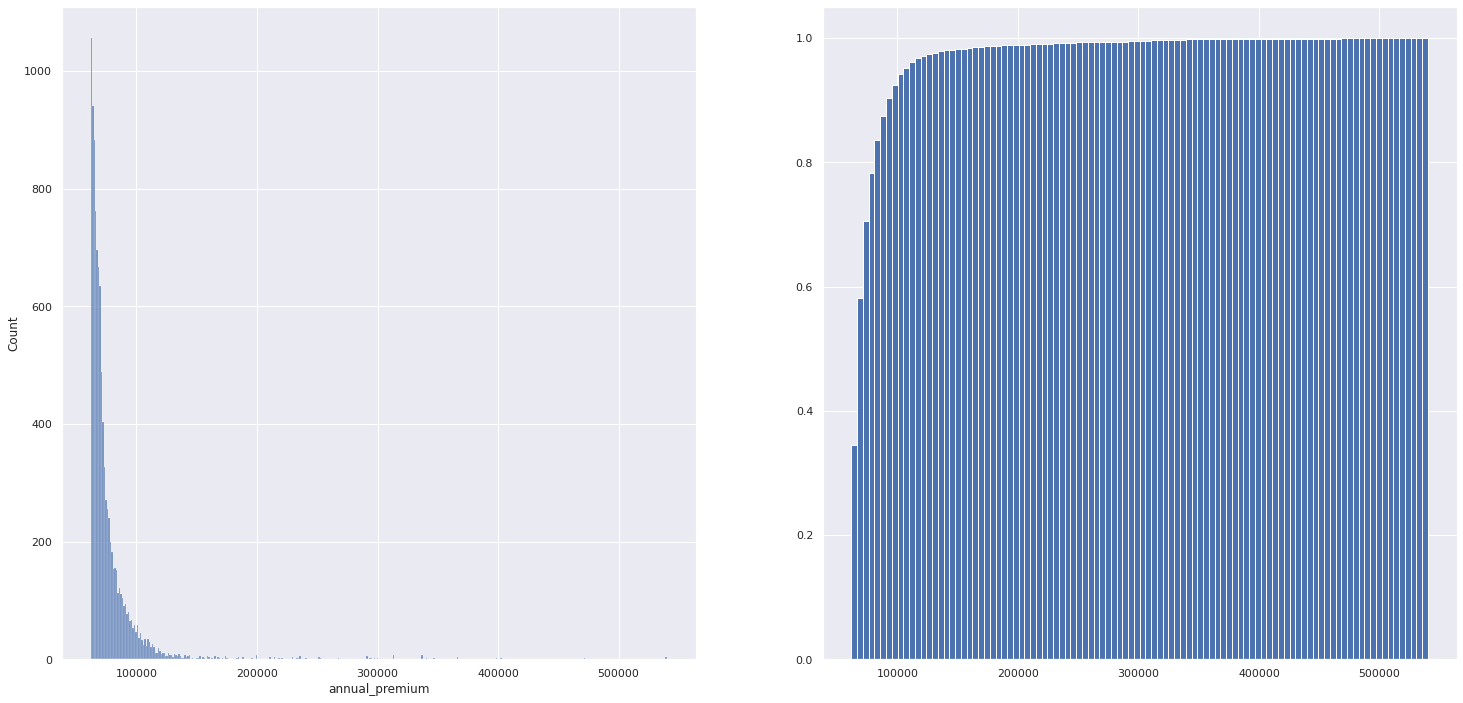

In [28]:
outlier = df4[df4['annual_premium'] > (1.5*iqr + q3)]['annual_premium']

plt.subplot(121)
sns.histplot(outlier)
plt.subplot(122)
outlier.hist(cumulative=True,density=1,bins=100)

<AxesSubplot:xlabel='response', ylabel='annual_premium'>

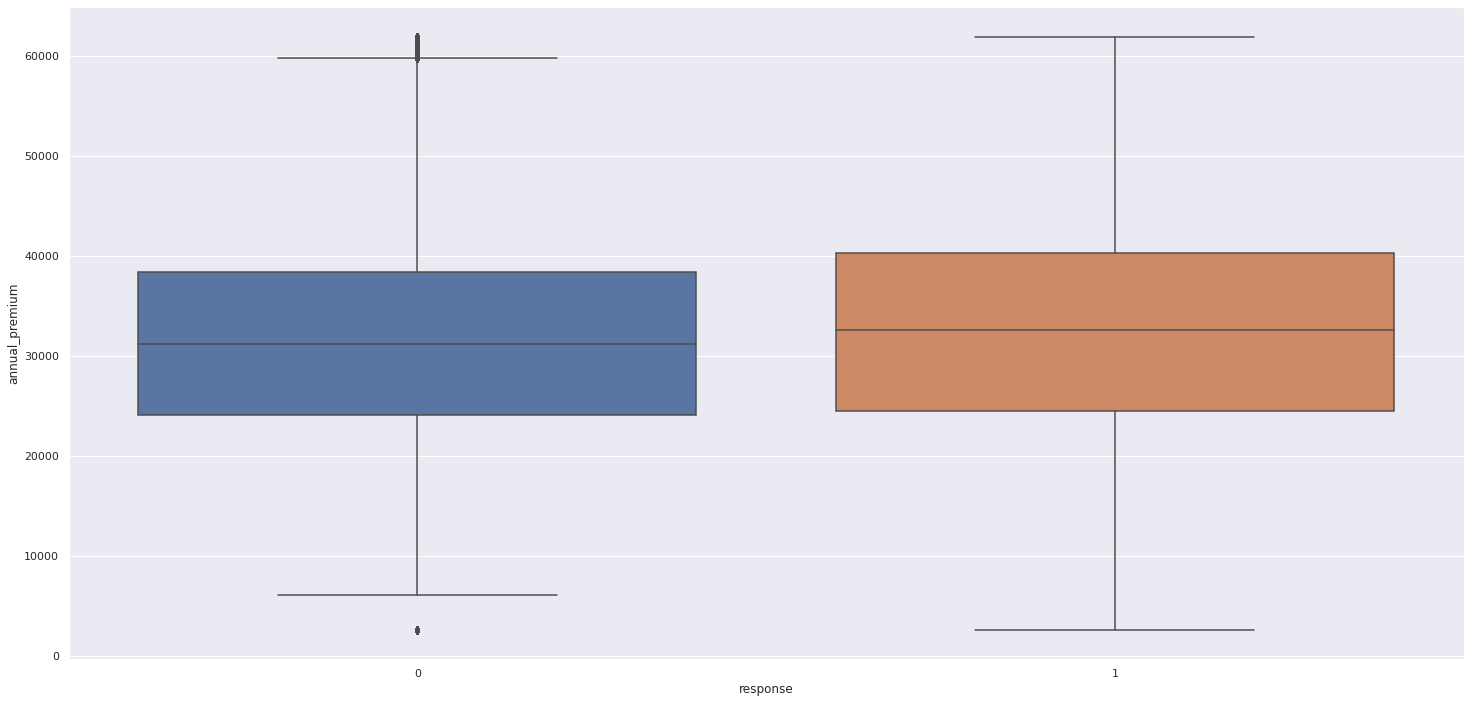

In [29]:
sns.boxplot(x='response',y='annual_premium',data=df4[df4['annual_premium'] < (1.5*iqr + q3)])

#### 4.1.11 Vintage

<AxesSubplot:xlabel='response', ylabel='vintage'>

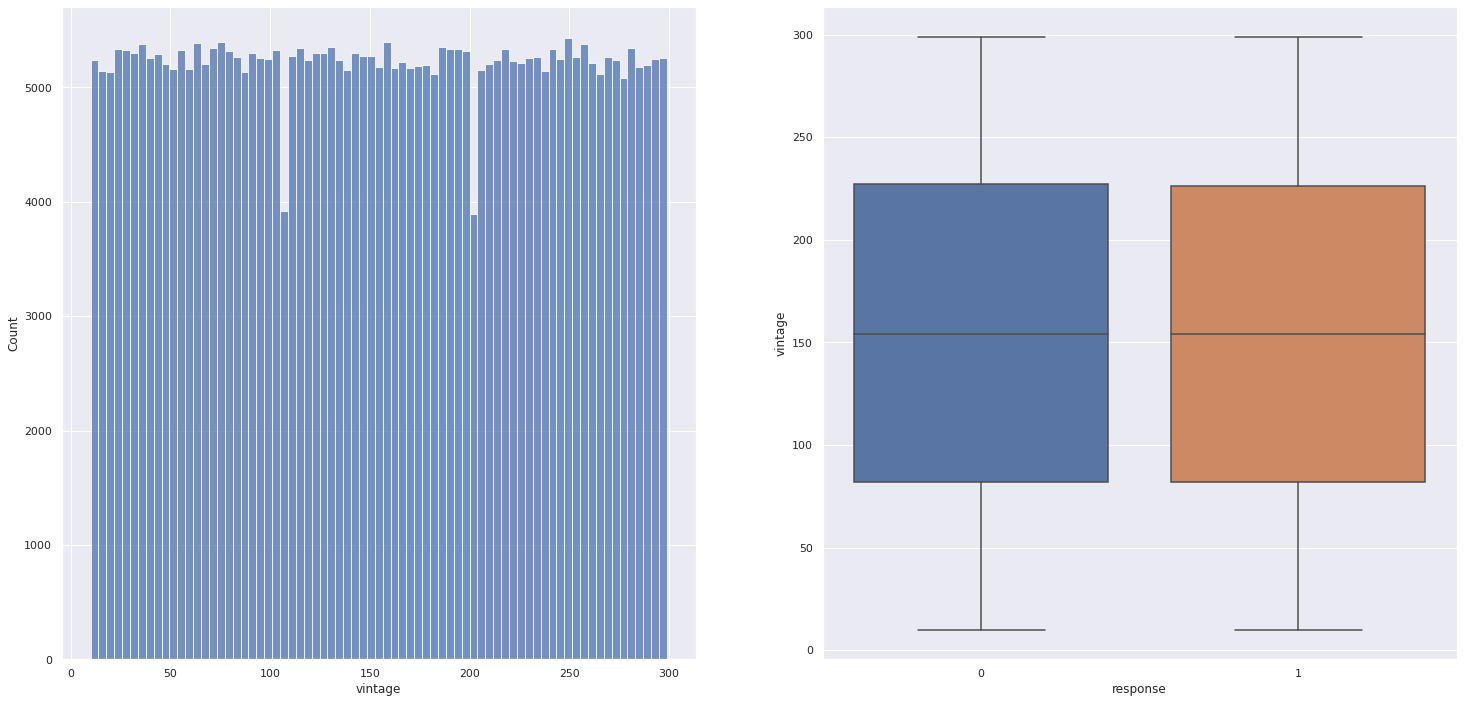

In [30]:
plt.subplot(121)
sns.histplot(x='vintage',data=df4)

plt.subplot(122)
sns.boxplot(x='response',y='vintage',data=df4)

<AxesSubplot:xlabel='vintage', ylabel='annual_premium'>

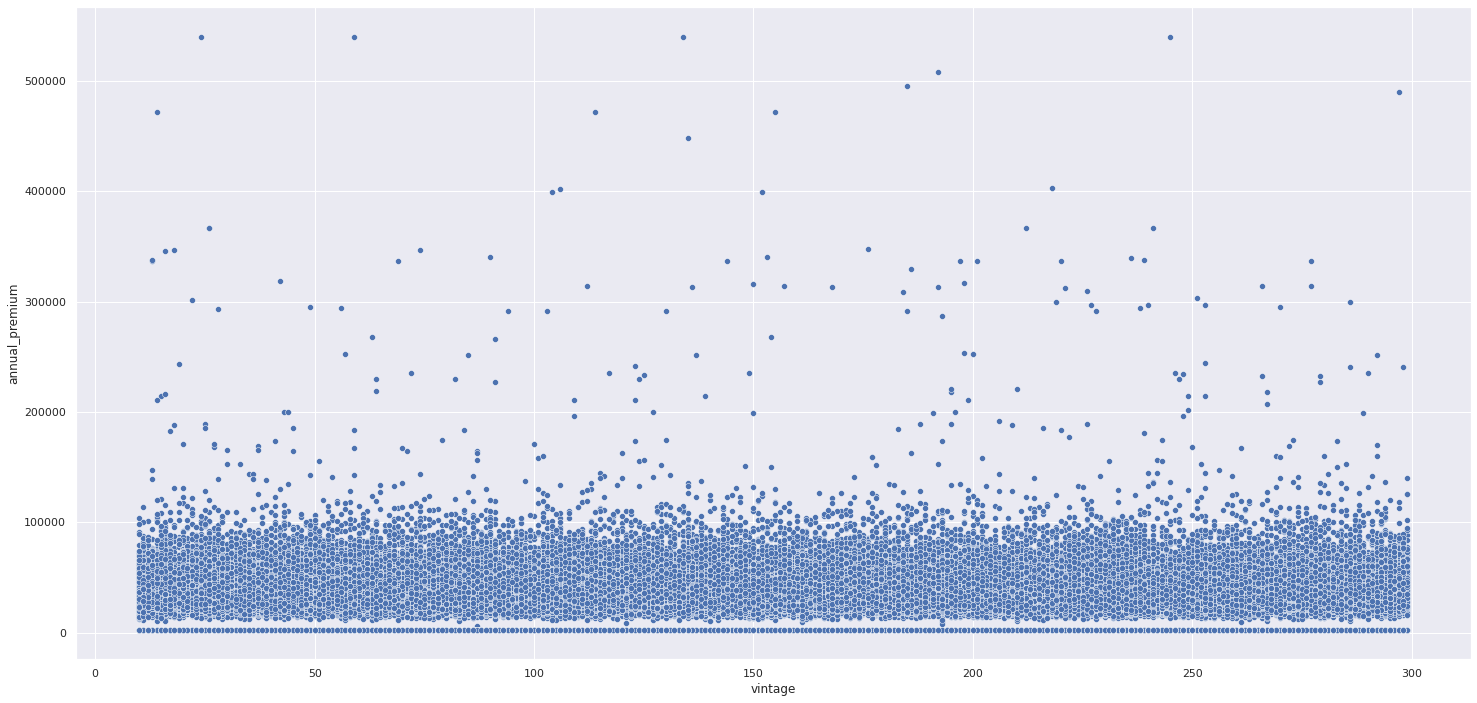

In [31]:
sns.scatterplot(x='vintage',y='annual_premium',data=df4)

### 4.2- Hypothesis verifications

##### **H1**- Clientes do gênero masculino estão mais interessados em adquirir o seguro;

(**Verdadeiro!** Aproximadamente 61,07% dos clientes interessados são do gênero masculino.)

male      0.610683
female    0.389317
Name: gender, dtype: float64

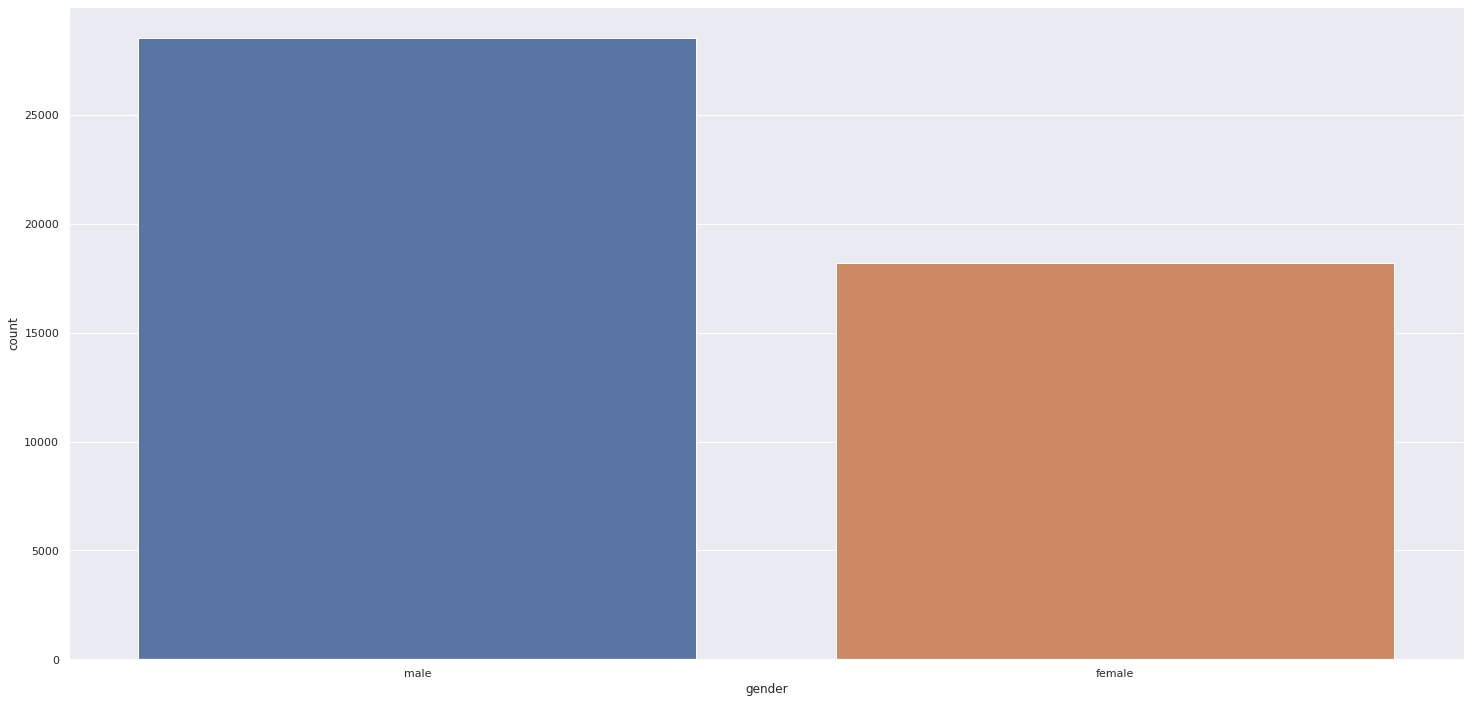

In [32]:
aux = df4[df4['response'] == 1]
sns.countplot(x='gender',data=aux)
aux['gender'].value_counts(normalize=True)

In [33]:
aux['gender'].value_counts(normalize=True)

male      0.610683
female    0.389317
Name: gender, dtype: float64

##### **H2**- Clientes que aportam um valor maior que a média de prêmio anual não estão interessados;

(**FALSO!** Cerca de 13% dos clientes que fazem aportes acima da média de prêmio anual estão interessados em andiquiris o seguro. Destes, como anteriormente, a maioria pertence ao gênero masculino (61,26%).) 

gender  response
male    0           0.470285
female  0           0.397665
male    1           0.080897
female  1           0.051153
dtype: float64

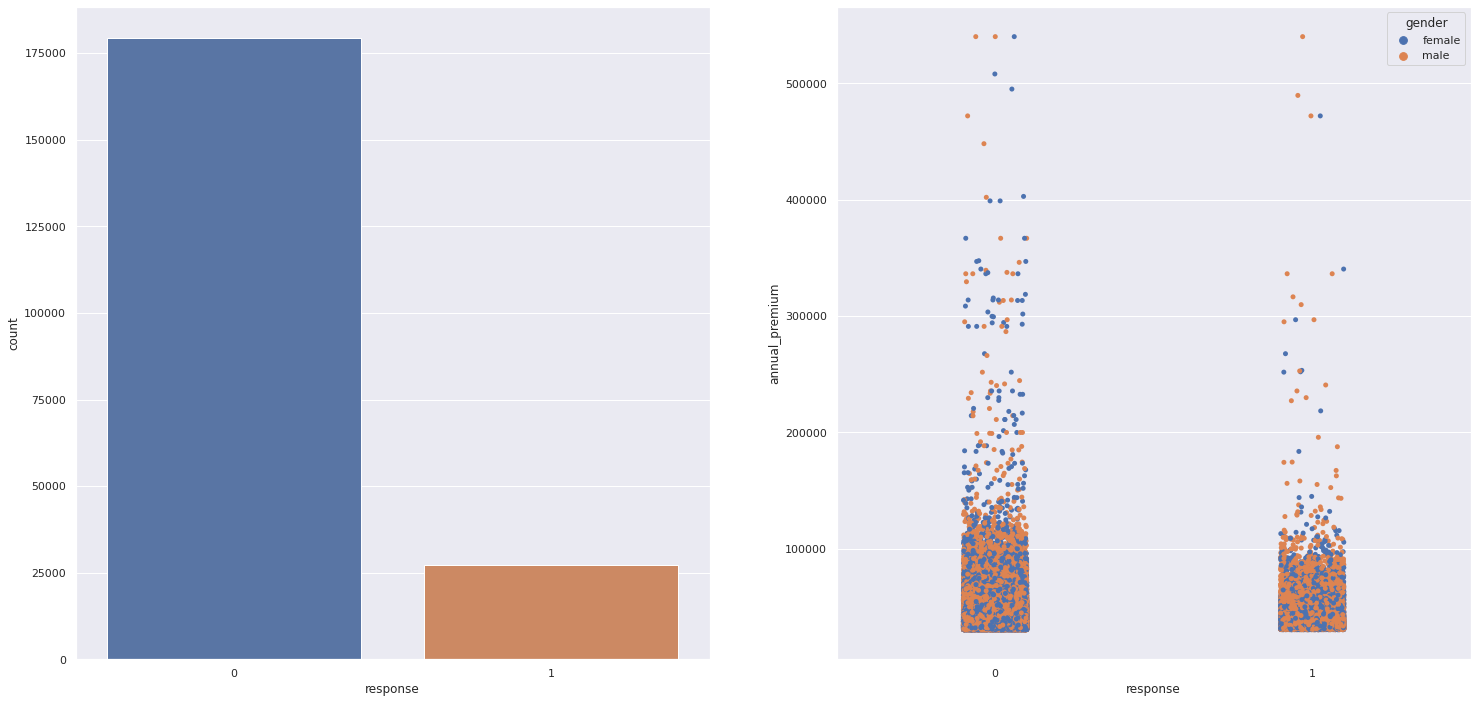

In [34]:
annual_premium_mean = df4['annual_premium'].mean()
aux = df4[df4['annual_premium'] > annual_premium_mean]

plt.subplot(1,2,1)
sns.countplot(x='response',data=aux)

plt.subplot(1,2,2)
sns.stripplot(y='annual_premium',x='response',hue='gender',data=aux)

aux[['gender','response']].value_counts(normalize=True)

In [35]:
aux[(aux['response'] == 1)]['gender'].value_counts(normalize=True)

male      0.612625
female    0.387375
Name: gender, dtype: float64

##### **H3**- Clientes de certas regiões demonstram pouco (<1%) ou nenhum (0%) interesse no seguro oferecido;

(**FALSO!** Em todas as 53 regiões que abrangem o serviço, os clientes interessados compuseram uma parcela maior que 1% do total de clientes. **A região com mais clientes interessados é a 38, com 19,2% do total**, enquanto **a com menos clientes interessados é a 44, com apenas 4,08%**)

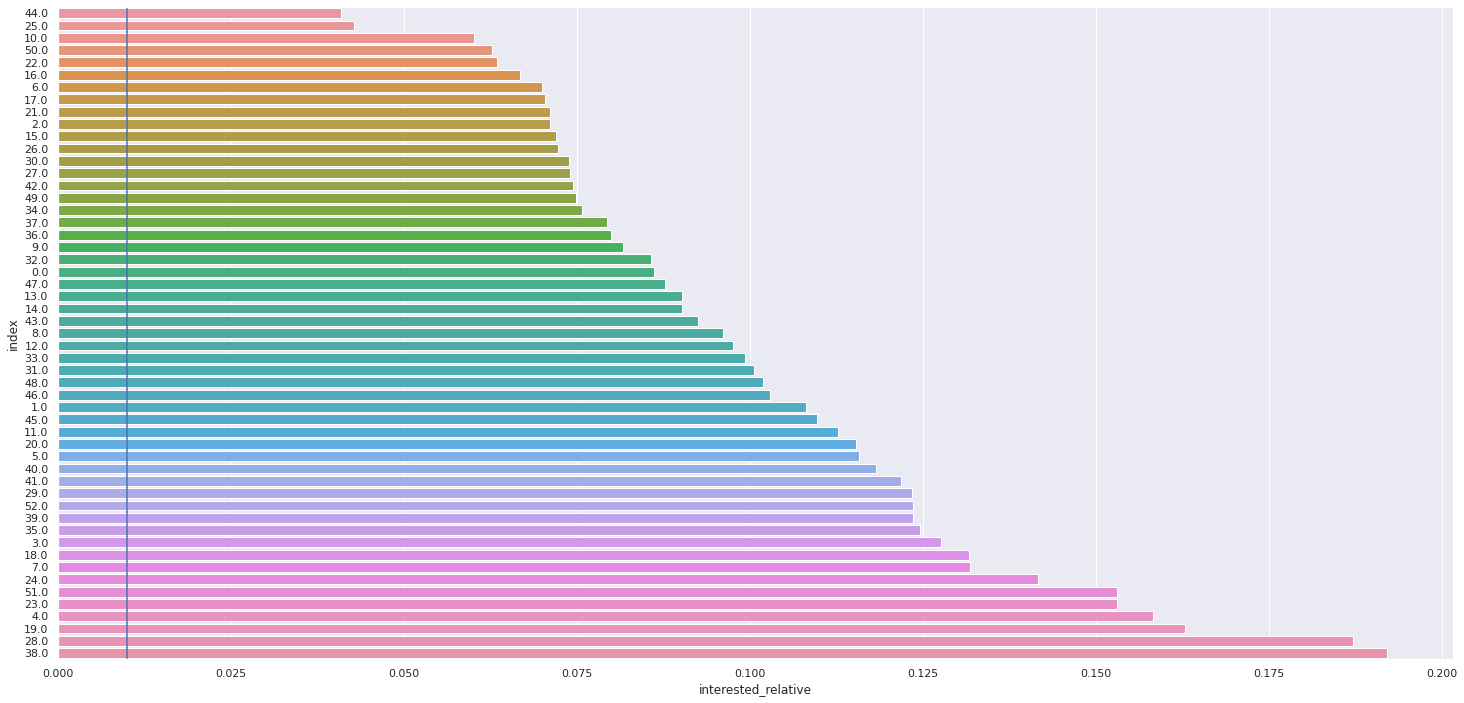

In [36]:
full_region = df4['region_code'].value_counts()
aux = df4[df4['response']==1]['region_code']

aux = aux.value_counts()

aux = pd.DataFrame([full_region,aux,aux/full_region],index = ['total','interested','interested_relative'])
aux = aux.T

aux.sort_values('interested_relative',inplace=True)
aux = aux.reset_index()

sns.barplot(x=aux['interested_relative'],y=aux['index'], order =aux['index'], orient='h')

plt.axvline(0.01,0.0,52.0)

In [37]:
aux.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
index,44.000000,25.000000,10.000000,50.000000,22.000000,16.000000,6.000000,17.00000,21.000000,2.000000,15.000000,26.000000,30.000000,27.000000,42.00000,49.000000,34.000000,37.000000,36.000000,9.000000,32.000000,0.000000,47.000000,13.000000,14.000000,43.000000,8.000000,12.000000,33.000000,31.00000,48.000000,46.000000,1.000000,45.000000,11.00000,20.000000,5.000000,40.000000,41.000000,29.000000,52.000000,39.0000,35.000000,3.000000,18.000000,7.000000,24.000000,51.000000,23.000000,4.000000,19.000000,28.000000,38.000000
total,808.000000,2503.000000,4374.000000,10243.000000,1309.000000,2007.000000,6280.000000,2617.00000,4266.000000,4038.000000,13308.000000,2587.000000,12191.000000,2823.000000,591.00000,1832.000000,1664.000000,5501.000000,8797.000000,3101.000000,2787.000000,2021.000000,7436.000000,4036.000000,4678.000000,2639.000000,33877.000000,3198.000000,7654.000000,1960.00000,4681.000000,19749.000000,1008.000000,5605.000000,9232.00000,1935.000000,1279.000000,1295.000000,18263.000000,11065.000000,267.000000,4644.0000,6942.000000,9251.000000,5153.000000,3279.000000,2415.000000,183.000000,1960.000000,1801.000000,1535.000000,106415.000000,2026.000000
interested,33.000000,107.000000,263.000000,642.000000,83.000000,134.000000,439.000000,184.00000,303.000000,287.000000,958.000000,187.000000,900.000000,209.000000,44.00000,137.000000,126.000000,436.000000,703.000000,253.000000,239.000000,174.000000,652.000000,364.000000,422.000000,244.000000,3257.000000,312.000000,760.000000,197.00000,477.000000,2032.000000,109.000000,615.000000,1041.00000,223.000000,148.000000,153.000000,2224.000000,1365.000000,33.000000,574.0000,865.000000,1181.000000,678.000000,432.000000,342.000000,28.000000,300.000000,285.000000,250.000000,19917.000000,389.000000
interested_relative,0.040842,0.042749,0.060128,0.062677,0.063407,0.066766,0.069904,0.07031,0.071027,0.071075,0.071987,0.072284,0.073825,0.074035,0.07445,0.074782,0.075721,0.079258,0.079914,0.081587,0.085755,0.086096,0.087682,0.090188,0.090209,0.092459,0.096142,0.097561,0.099294,0.10051,0.101901,0.102891,0.108135,0.109723,0.11276,0.115245,0.115715,0.118147,0.121776,0.123362,0.123596,0.1236,0.124604,0.127662,0.131574,0.131747,0.141615,0.153005,0.153061,0.158245,0.162866,0.187163,0.192004


#####  ~**H4**- Existe uma correlação forte entre as regiões e os clientes segurados/interessados em seguro;~ (Próximo ciclo do CRISP)

##### **H5**- Clientes interessados são associados à empresa menor a um tempo menor ou igual a não interessados;

(**FALSO!** O período de associação à empresa quase idêntico entre interessados e não interessados. o tempo médio de associação dos interessados é apenas **0,2%** menor que os interessados!)

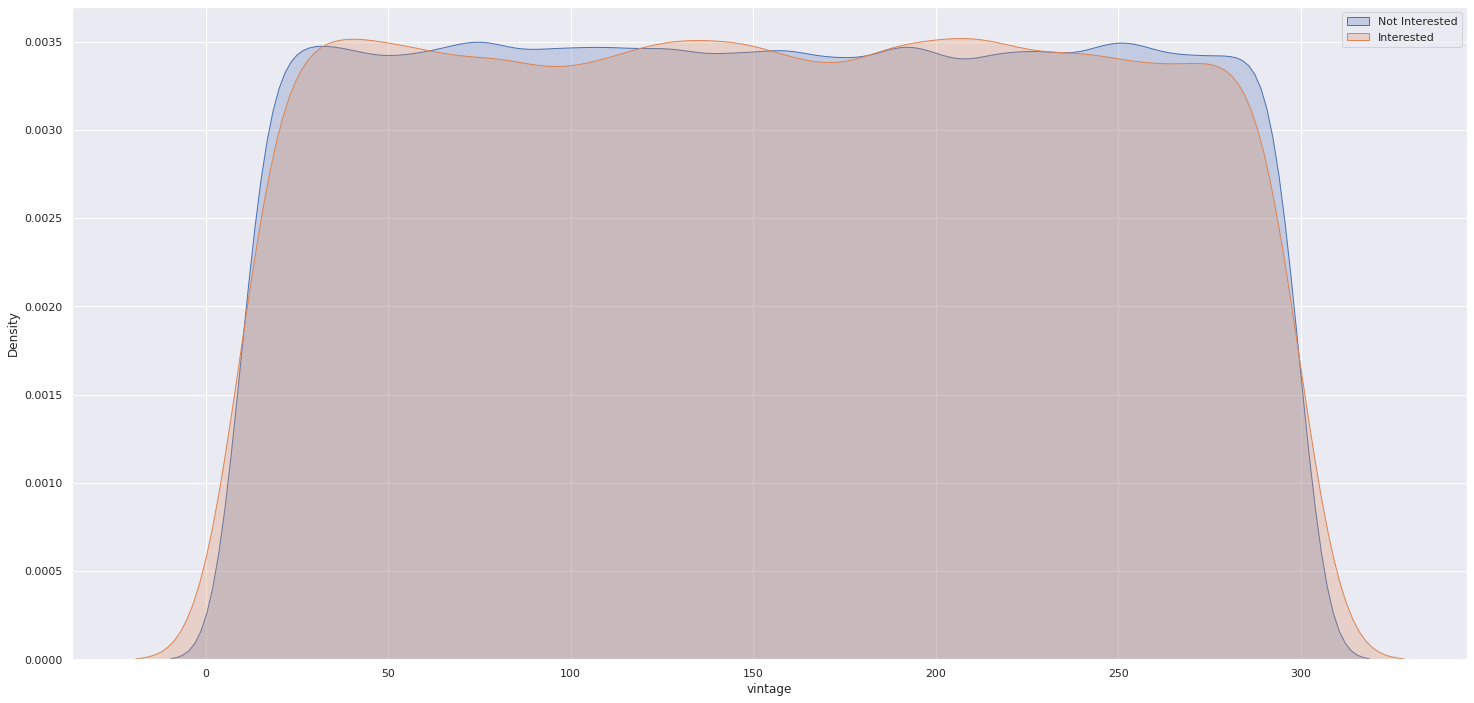

In [38]:
vintage_0 = df4[df4['response'] == 0]['vintage']

time_mean = df4['vintage'].mean()
vintage_1 = df4[df4['response'] == 1]['vintage']

sns.kdeplot(vintage_0,fill=True)
sns.kdeplot(vintage_1,fill=True)
plt.legend(['Not Interested','Interested'])

In [39]:
vintage_1.mean()/vintage_0.mean(),vintage_1.std()/vintage_0.std()

(0.9982640421834285, 1.0009155741931195)

##### **H6**- A idade média dos clientes interessados varia de acordo com a região;
(**VERDADEIRO!** Como esperado, a média das idades variam bastante. 14 das 53 regiões apresentam uma média maior que a média total dos interessados no seguro.) **REFAZER!**

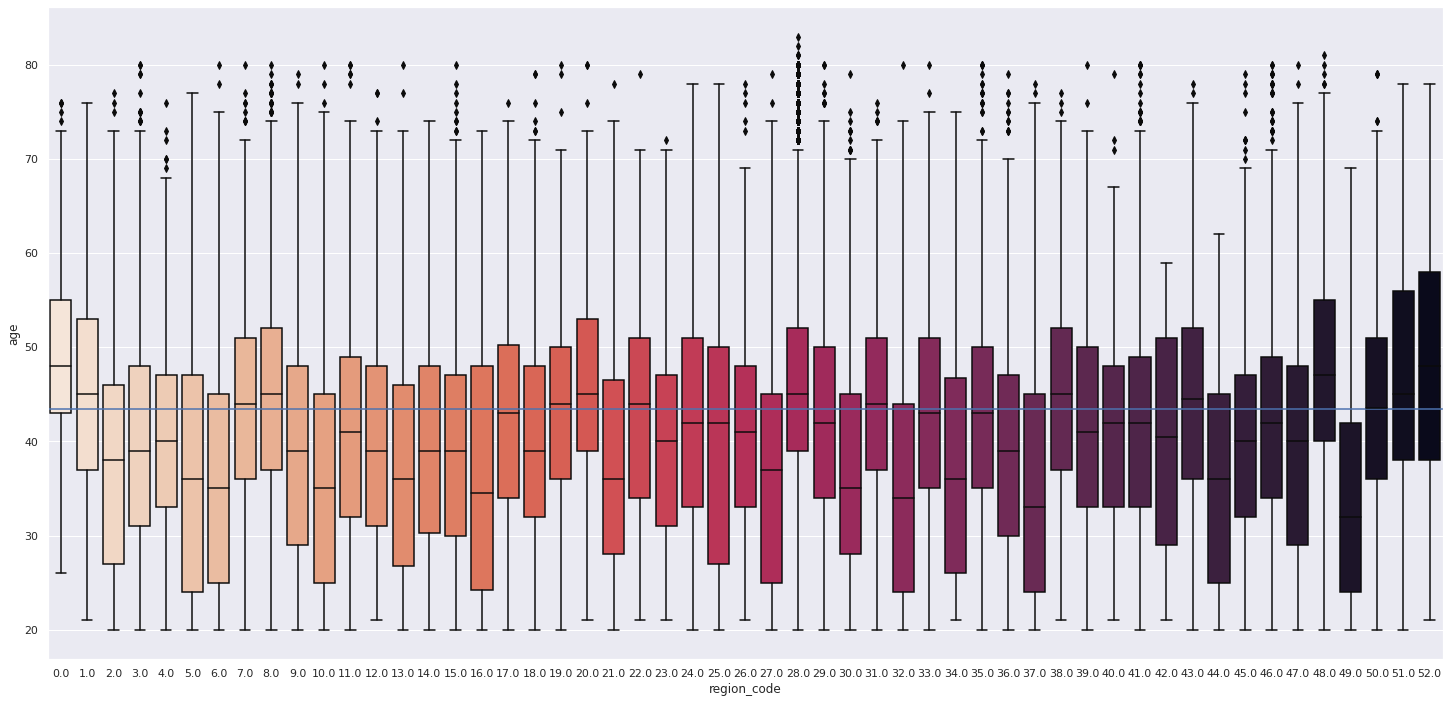

In [40]:
aux = df4[df4['response'] == 1][['age','region_code']]

sns.boxplot(x='region_code',y='age',data=aux,palette='rocket_r')
plt.axhline(aux['age'].mean(),0,52)

In [41]:
a2 =aux.groupby('region_code').mean()
a2['avg+'] = a2['age'] > aux['age'].mean()
a2['avg+'].value_counts()

False    39
True     14
Name: avg+, dtype: int64

##### **H7**- A idade média dos clientes interessados no seguro é maior que os clientes não interessados;
(**VERDADEIRO!** A idade média dos interessados no seguro é aproximadamente 5 anos maior que a idade de não interessados.)

5.2573326296766965

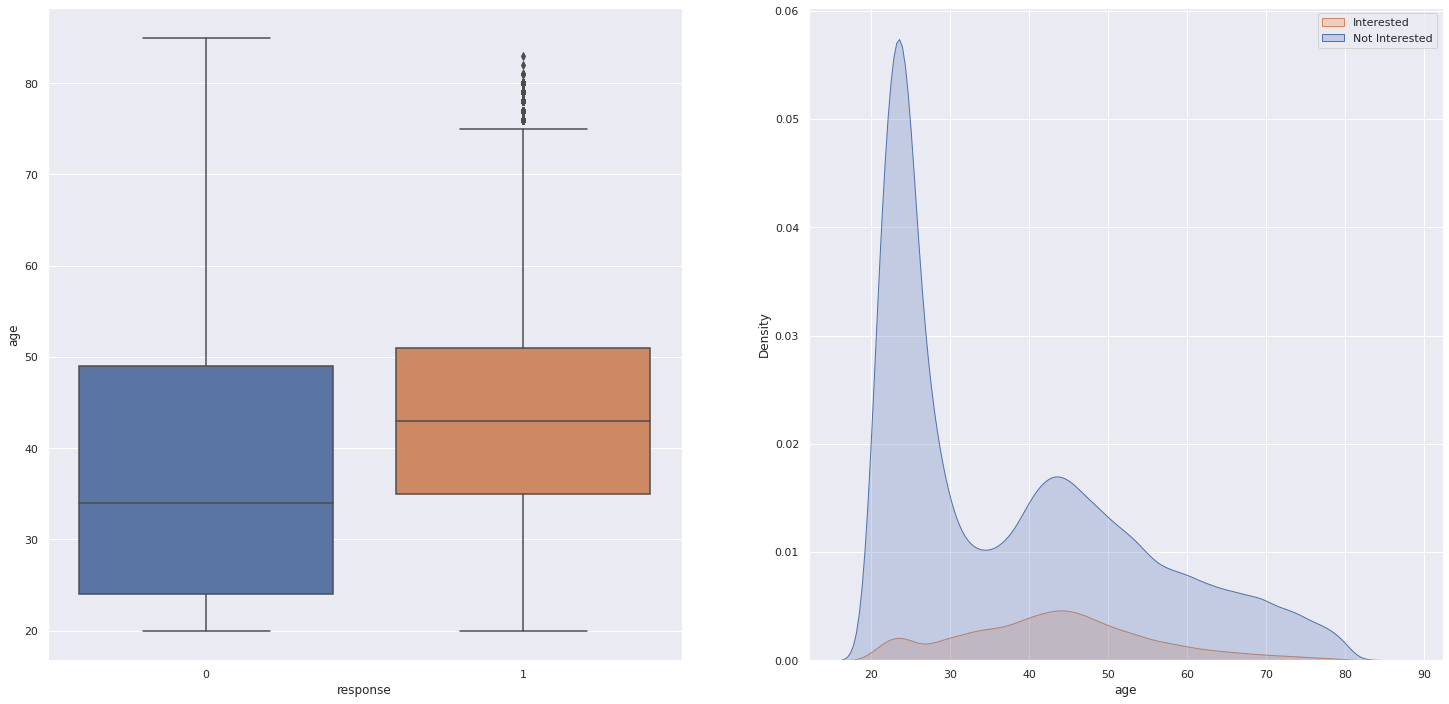

In [56]:
plt.subplot(1,2,1)
sns.boxplot(x='response', y='age',data=df4)

a1 = df4[df4['response'] == 0]['age'].mean()
a2 = df4[df4['response'] == 1]['age'].mean()

plt.subplot(1,2,2)
sns.kdeplot(x= 'age',hue='response',data=df4, fill=True)
plt.legend(['Interested','Not Interested'])
abs(a1-a2)

In [58]:
a1, a2

(38.17822720761725, 43.435559837293944)

#####  ~**H8**- Existe uma correlação entre os clientes interessados e o código anônimo;~ (Prox Ciclo CRISP)

##### **H9**- Apenas clientes habilitados tem interesse no seguro;
(**VERDADEIRO!** Já era esperado. Apenas pessoas habilitadas se interessam no seguro. é uma das conclusões óbvias, que podem surpreender muito caso não se verifiquem verdadeiras.)

<AxesSubplot:xlabel='driving_license', ylabel='count'>

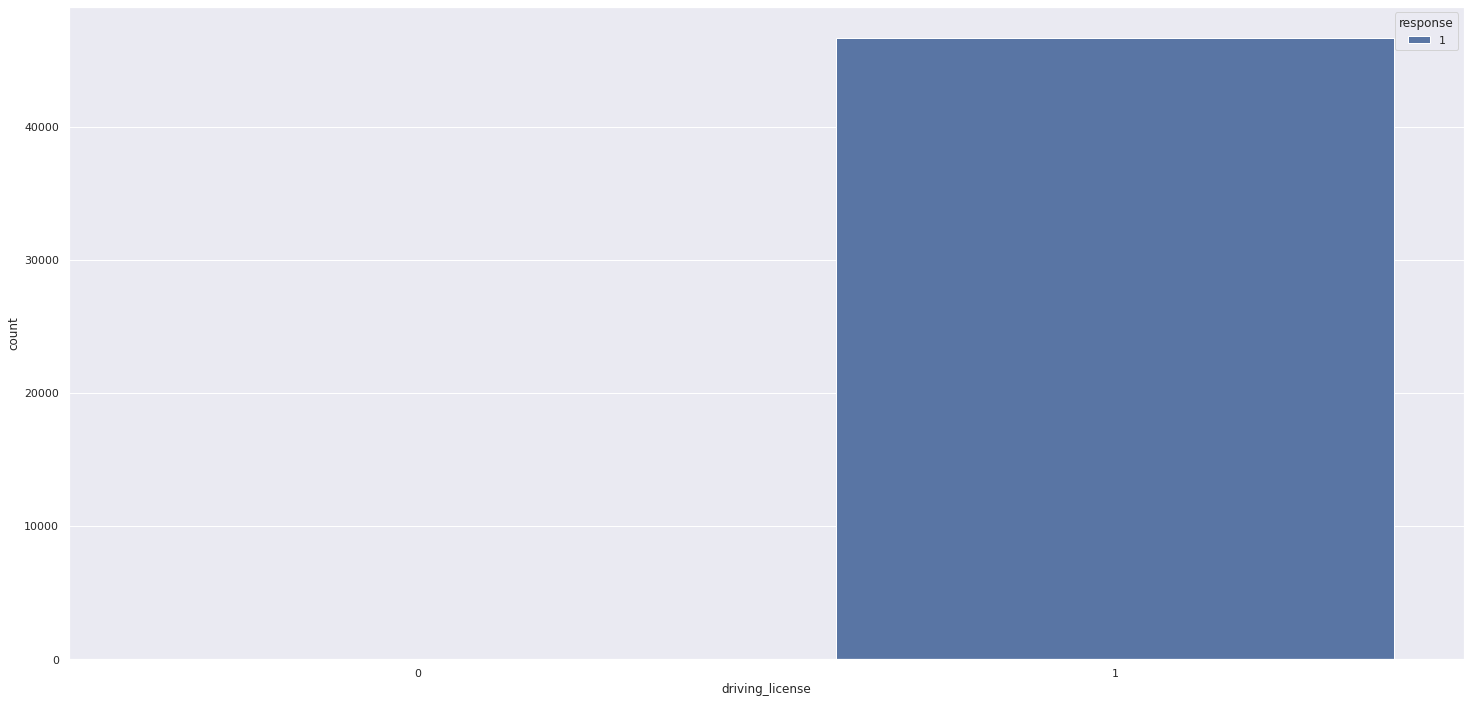

In [43]:
sns.countplot(x='driving_license',hue='response',data=df4[df4['response']==1])

##### **H10**- Os clientes interessados no seguro, em sua maior parte, nunca danificaram seus veiculos;
(**FALSO!** Na realidade, é o extremo oposto! aproximadamente **98%** dos clientes interessados em adquirir o seguro já danificaram o seu veículo!)

<AxesSubplot:xlabel='vehicle_damage', ylabel='count'>

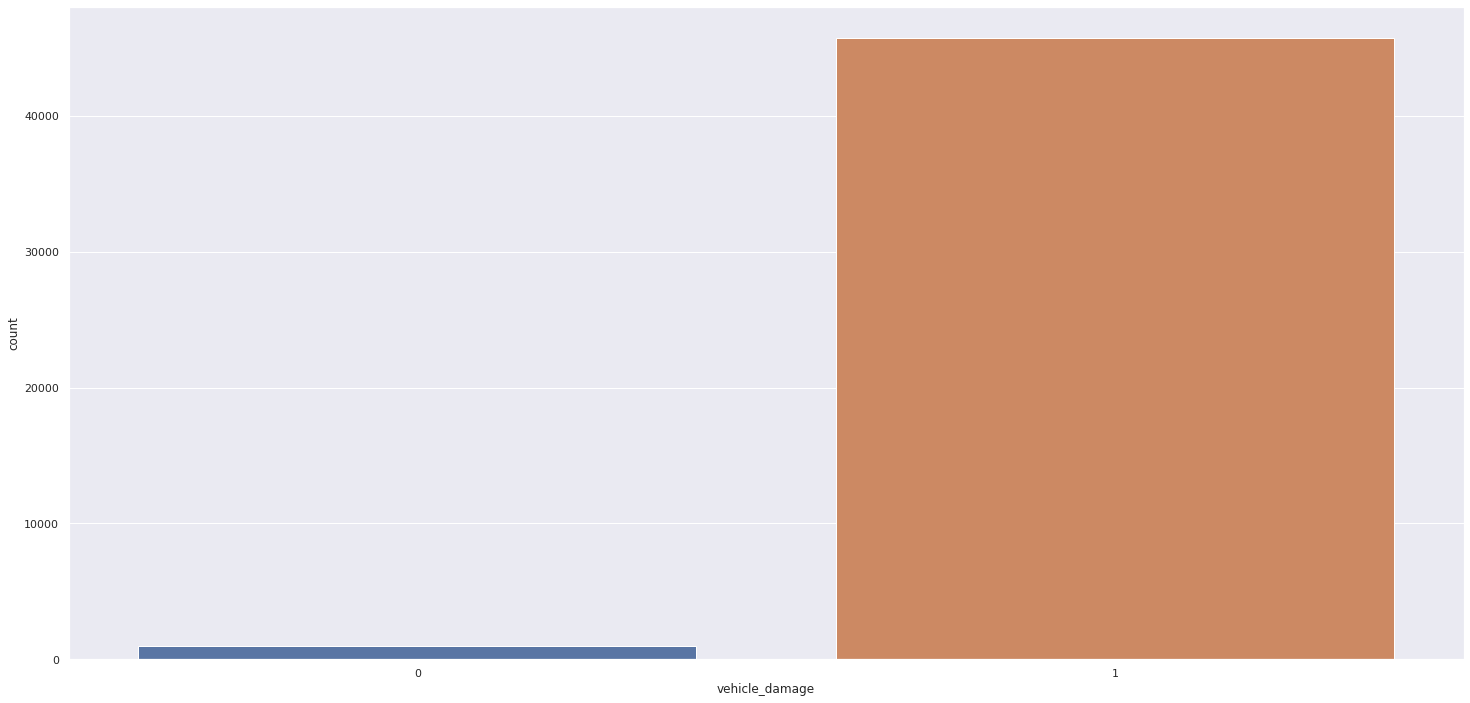

In [44]:
sns.countplot(x='vehicle_damage',data=df4[df4['response']==1])

In [45]:
df4[df4['response']==1]['vehicle_damage'].value_counts(normalize=True)

1    0.978977
0    0.021023
Name: vehicle_damage, dtype: float64

##### **H11**- Mais da metade dos clientes interessados no seguro tem um veículo a menos de 1 ano;
(**FALSO!** Apenas 15% dos clientes interessados possuem veículo a menos de 1 ano. Grande maioria (74%) dos interessados tem o veículo a até 2 anos. Apenas 10% dos interessados possuem o veículo a mais de 2 anos.)

<AxesSubplot:xlabel='vehicle_age', ylabel='count'>

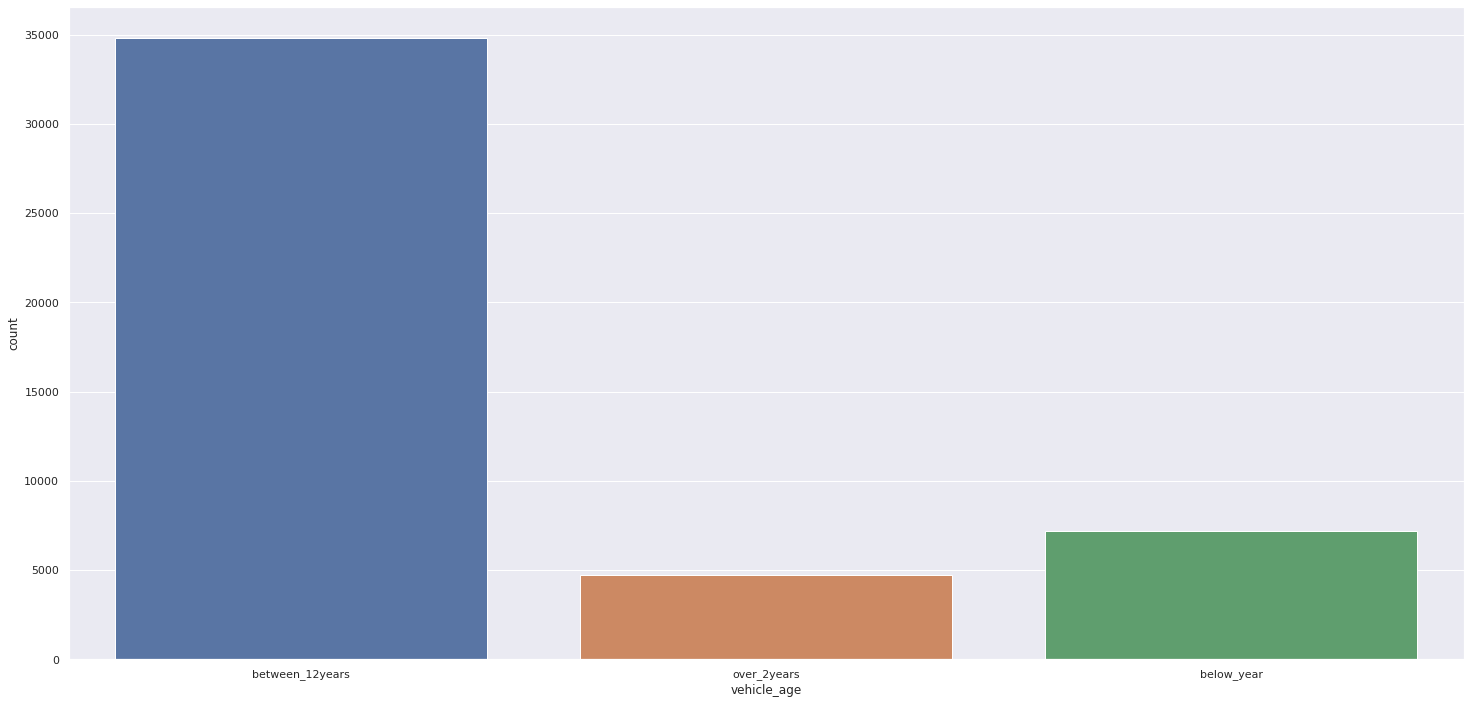

In [46]:
sns.countplot(x='vehicle_age',data = df4[df4['response']==1])

In [47]:
df4[df4['response']==1]['vehicle_age'].value_counts(normalize=True)

between_12years    0.745151
below_year         0.154185
over_2years        0.100664
Name: vehicle_age, dtype: float64

##### **H12**- Regiões com o menor número de clientes segurados possuem menos interesse em adquirir o seguro;
(**FALSO!** A quantidade de interessados não necessariamente é pequena em regiões com menor quantidade de segurados.)

<AxesSubplot:xlabel='response', ylabel='region_code'>

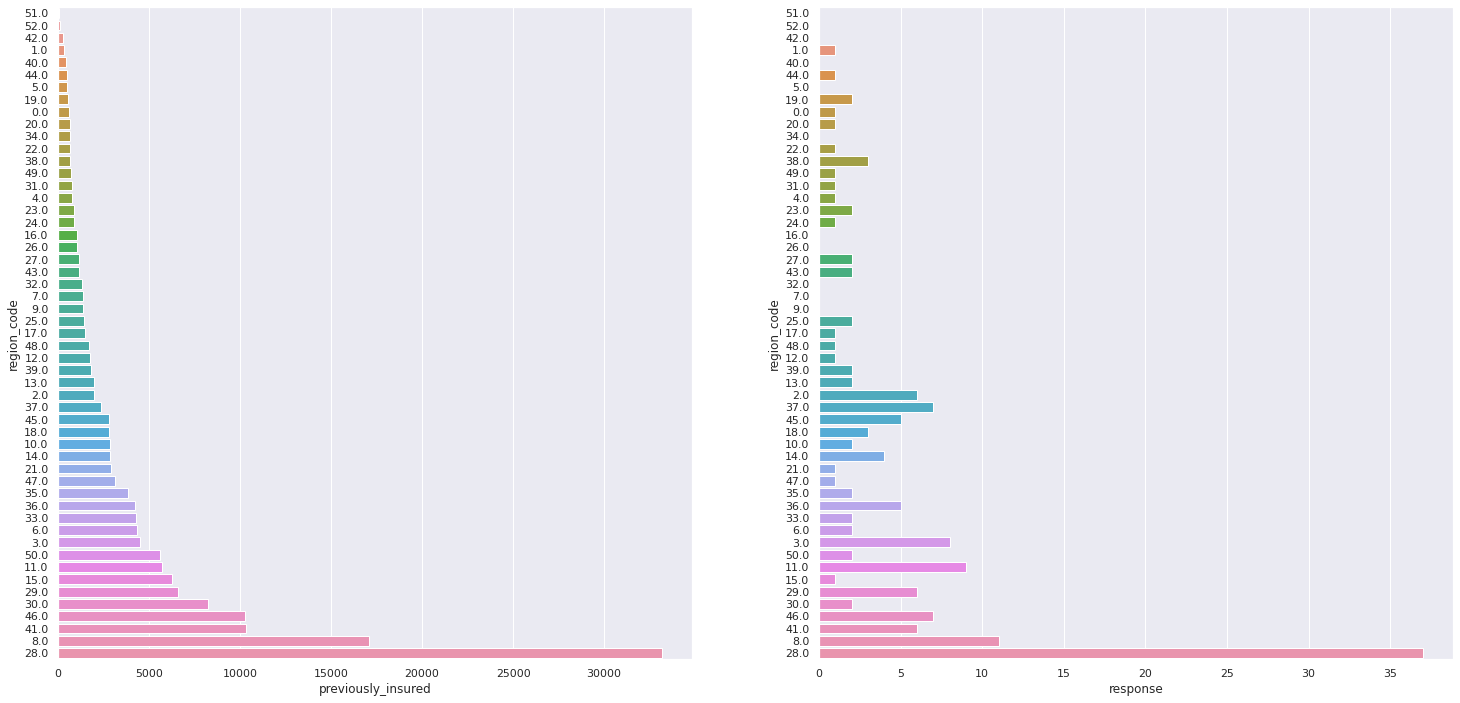

In [48]:
aux = df4[df4['previously_insured']==1]
a2 = aux.groupby('region_code').sum().sort_values(by=['previously_insured','response'])

a2 = a2.sort_values('previously_insured').reset_index()

plt.subplot(1,2,1)
sns.barplot(x='previously_insured',y='region_code',order= a2['region_code'],data=a2,orient='h')

plt.subplot(1,2,2)
sns.barplot(x='response',y='region_code',order= a2['region_code'],data=a2,orient='h')

##### **H13**- A maior parte dos interessados não possui ainda um seguro de carro;
(**VERDADEIRO!** Apenas 0,34% do grupo dos interessados tem interesse em adquirir o novo seguro.)

<AxesSubplot:xlabel='previously_insured', ylabel='count'>

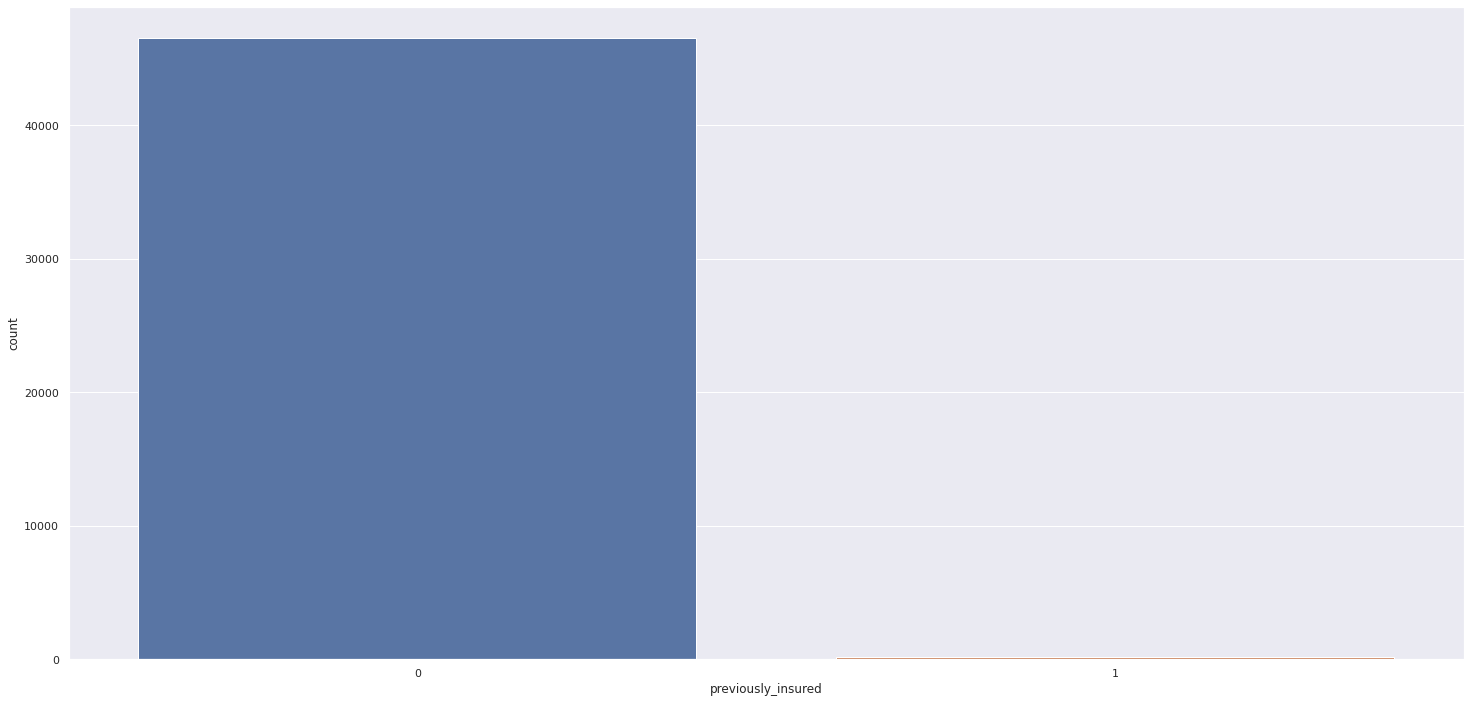

In [49]:
sns.countplot(x='previously_insured',data=df4[df4['response']==1])

In [50]:
df4[df4['response']==1]['previously_insured'].value_counts(normalize=True)

0    0.996617
1    0.003383
Name: previously_insured, dtype: float64

#### Resultados (resumido):

In [51]:
tab = [['Hipótese','Importância','Conclusão'],
      ['H1','Alta','Verdadeira'],
      ['H2','Baixa','Falsa'],
      ['H3','Média','Verdadeira'],
      ['H5','Alta','Falsa'],
      ['H6','Baixa','Verdadeira'],
      ['H7','Média','Verdadeira'],
      ['H9','Baixa','Verdadeira'],
      ['H10','Alta','Falsa'],
      ['H11','Alta','Falsa'],
      ['H12','Média','Falsa'],
      ['H13','Média','Verdadeira']]

print(tabulate(tab, headers='firstrow'))

Hipótese    Importância    Conclusão
----------  -------------  -----------
H1          Alta           Verdadeira
H2          Baixa          Falsa
H3          Média          Verdadeira
H5          Alta           Falsa
H6          Baixa          Verdadeira
H7          Média          Verdadeira
H9          Baixa          Verdadeira
H10         Alta           Falsa
H11         Alta           Falsa
H12         Média          Falsa
H13         Média          Verdadeira


### 4.3 - Multivariate Analysis

#### 4.3.1 - Numerical Categories

In [52]:
df4.columns

Index(['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
       'driving_license', 'vehicle_age', 'vehicle_damage',
       'previously_insured', 'annual_premium', 'vintage', 'response'],
      dtype='object')

<AxesSubplot:>

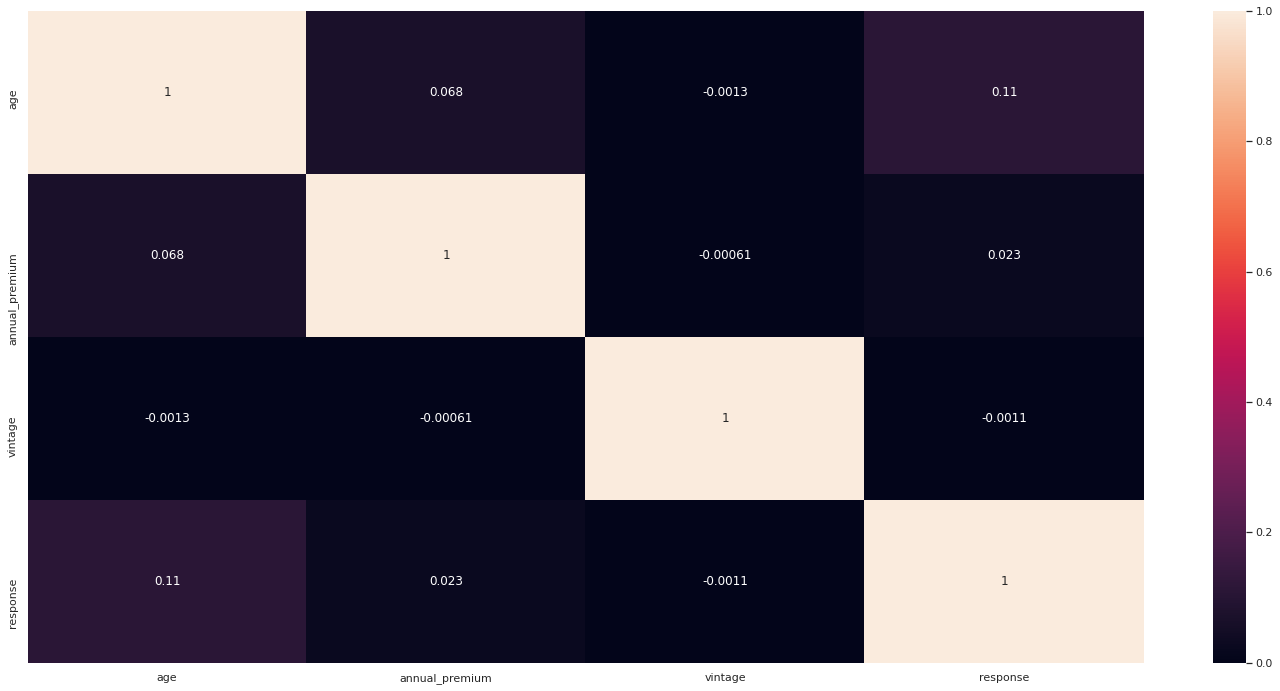

In [53]:
num = ['age','annual_premium','vintage','response'] #Mesmo que Response seja categorica, seu valor numerico atende aos mesmos fins para o calculo da correlação

sns.heatmap(df4[num].corr(method = 'pearson'),annot = True)

#### 4.3.2 - Categorical  Variables

<AxesSubplot:>

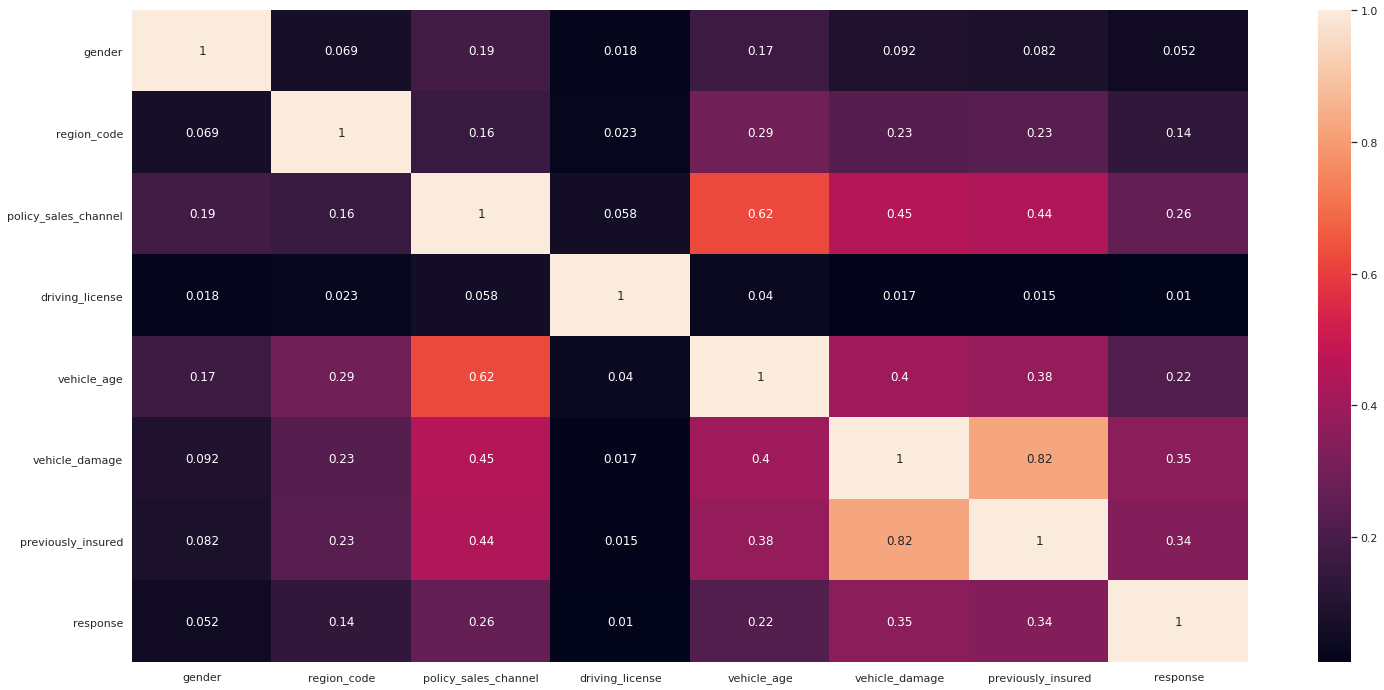

In [54]:
cat = [f for f in df4.columns if f not in ['age','annual_premium','vintage'] and f != 'id']
sns.heatmap(categorical_feature_correlation(df4[cat]),annot=True)